In [2]:
import gensim
import pandas as pd
import numpy as np
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
from sklearn.manifold import TSNE

In [3]:
data = pd.read_csv('Books.csv')
data = data.loc[:,['title','author','description','stars']]
data.describe(include='all')
text = data['description'];

C:\Users\qkava\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning:

Columns (4,5,6,8,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,

In [4]:
def read_corpus(fname, tokens_only=False):
    
    for i, line in enumerate(fname):
        tokens = gensim.utils.simple_preprocess(line)
        if tokens_only:
            yield tokens
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus(text))
# test_corpus = list(read_corpus(text, tokens_only=True))
train_corpus[:1]

[TaggedDocument(words=['in', 'his', 'revolutionary', 'new', 'book', 'dave', 'allred', 'therealbarman', 'com', 'uses', 'his', 'fifteen', 'years', 'of', 'professional', 'bartending', 'and', 'bar', 'management', 'experience', 'to', 'provide', 'you', 'with', 'powerful', 'step', 'by', 'step', 'detail', 'by', 'detail', 'blueprint', 'for', 'securing', 'high', 'paying', 'bartending', 'job', 'with', 'little', 'or', 'no', 'experience', 'most', 'bartending', 'books', 'on', 'the', 'market', 'are', 'simply', 'list', 'of', 'drink', 'recipes', 'and', 'bar', 'tools', 'with', 'bland', 'advice', 'on', 'what', 'skills', 'it', 'takes', 'to', 'become', 'bartender', 'dave', 'book', 'is', 'inspiring', 'dynamic', 'and', 'offers', 'powerful', 'techniques', 'for', 'aspiring', 'bartenders', 'including', 'how', 'to', 'set', 'specific', 'goals', 'that', 'get', 'you', 'job', 'as', 'quickly', 'as', 'possible', 'how', 'to', 'choose', 'the', 'best', 'bars', 'to', 'work', 'at', 'based', 'on', 'your', 'personality', 'ho

In [5]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=100, min_count=2, epochs=40)
model.build_vocab(train_corpus)

In [6]:
for word in model.wv.vocab:
    print (word,model.wv.vocab[word].count)


in 165873
his 57051
revolutionary 594
new 29595
book 43636
dave 365
allred 2
therealbarman 2
com 2373
uses 1040
fifteen 557
years 12059
of 301613
professional 2220
bartending 28
and 364234
bar 598
management 3230
experience 4756
to 274145
provide 2035
you 89089
with 79179
powerful 4311
step 5735
by 40981
detail 1192
blueprint 345
for 94955
securing 53
high 5043
paying 323
job 3433
little 5066
or 27799
no 13534
most 19797
books 8149
on 61621
the 519775
market 2445
are 40823
simply 1808
list 1775
drink 455
recipes 5160
tools 2622
bland 59
advice 2626
what 27634
skills 2799
it 61244
takes 4727
become 5682
bartender 81
is 116308
inspiring 1142
dynamic 528
offers 4409
techniques 3405
aspiring 262
bartenders 17
including 6162
how 39016
set 4633
specific 1333
goals 1402
that 86426
get 13300
as 59012
quickly 1984
possible 2024
choose 1228
best 12434
bars 344
work 11148
at 30639
based 3660
your 47090
personality 758
owner 921
manager 755
staff 543
love 14444
before 7619
ever 7520
interview 633


realizes 802
serve 746
charles 926
mccaffrey 7
iv 180
imports 6
sums 41
took 1189
picked 186
carlos 83
head 1907
bath 97
club 947
doesn 3353
hold 1119
anything 2155
nodding 13
laughing 218
tells 1936
wish 860
started 1842
would 7148
helped 1055
maria 199
ritz 26
carlton 27
key 3307
biscayne 4
full 4714
vodka 46
pat 220
canyon 69
ranch 400
joe 981
allen 344
fantastic 426
sommelier 10
racketeer 8
guilty 300
thing 2708
keeping 990
engaged 395
until 4113
page 2688
usa 1174
bestseller 2194
history 7198
united 1909
states 2146
four 3490
active 629
federal 521
judges 90
murdered 950
judge 359
raymond 123
fawcett 16
number 1549
five 3155
body 4578
found 3845
remote 446
lakeside 24
cabin 242
sign 387
forced 1276
entry 253
struggle 1311
dead 3149
bodies 696
young 6030
secretary 185
extremely 466
secure 347
opened 325
emptied 11
killed 1007
malcolm 138
bannister 20
residing 14
prison 732
camp 541
near 952
maryland 74
though 2103
ace 113
sleeve 46
fbi 824
price 1675
known 3432
wasn 759
born 1562
y

gift 1151
item 112
round 286
forgotten 630
historian 452
aficionado 18
collection 3225
rare 922
worth 1235
rediscovered 52
shares 1245
latest 1668
trends 362
uncommon 121
profiles 230
movers 41
shakers 21
historic 371
facts 1000
images 911
sources 697
volume 2288
icy 124
unforgettable 949
introduces 665
wide 1180
variety 1035
regularly 572
appear 462
lists 465
favourite 86
introduction 1978
allowing 340
prepare 1028
tasting 125
suit 235
occasion 186
alphabetic 3
basic 1515
project 1460
finished 359
matters 741
answer 1560
manifesto 153
steven 307
pressfield 22
ideas 3039
doing 1858
resistance 341
tool 855
ship 514
projects 757
intelligent 480
malign 9
recognize 575
recognition 230
yours 310
pack 398
collectible 19
instant 653
dispels 38
starting 1210
gerber 26
sharp 644
gained 274
points 924
assumptions 226
expectations 385
technical 651
entrepreneurial 153
infancy 43
adolescent 101
growing 1711
pains 79
mature 330
perspective 1305
guiding 178
businesses 695
apply 1058
lessons 1673
fra

bailey 112
sec 33
flavor 273
combinations 93
andrew 533
schloss 5
liqueur 16
typically 140
combining 315
fruit 388
sugar 726
sit 352
straining 8
enjoying 329
fruits 317
herbs 247
spices 98
nuts 221
seeds 196
vegetables 504
tea 514
chocolate 741
cream 374
caramel 70
honey 211
butterscotch 29
infused 108
contain 331
sweeteners 33
irresistible 472
presents 1721
select 362
consumer 287
shop 782
sip 41
bathtub 32
gin 54
mojito 9
madness 335
demonstrating 143
mankind 281
oldest 233
pursuits 57
treated 191
tequila 52
tastings 7
educate 115
palate 64
blends 169
handy 352
notes 948
comments 219
potato 243
wheat 262
vodkas 5
mescal 2
irish 546
whiskeys 3
malt 20
scotch 25
desirable 88
further 1079
america 4552
guides 901
level 2039
advertise 36
try 1362
bet 192
ads 149
run 2139
leg 143
guarantee 222
productivity 381
stressing 26
servers 41
motivated 312
although 1039
server 107
paid 511
restauranteur 3
clary 22
explains 1948
per 391
average 525
tone 280
namesake 33
maximize 383
profits 471
consu

rejoices 5
compassionate 275
neva 4
wilson 378
keeper 132
isolated 255
elephants 41
feet 480
ruined 131
concrete 254
contacts 128
hatch 37
send 451
sanctuary 120
angry 372
unhappy 146
director 766
aggressive 160
revitalization 11
spotlights 11
attraction 977
inextricably 49
tying 39
fate 1050
charming 650
poignant 553
enthrall 39
diane 209
hammond 40
beautifully 641
menina 5
walker 310
hurricane 162
doomed 186
poverty 453
medal 157
legacy 705
orphaned 164
toddler 83
adopted 267
nineteen 154
excited 170
traumatic 143
dreams 2130
flees 114
spain 303
bury 76
misery 101
research 3524
thesis 79
sixteenth 85
signed 149
image 646
mugging 13
strands 46
musty 6
spanish 346
convent 59
exploring 501
surroundings 79
epic 877
sagas 30
orphan 162
girls 1173
inquisition 54
received 543
escaping 115
link 452
coincidence 93
historical 2281
sisterhood 75
emotionally 489
charged 373
continents 125
centuries 766
frank 838
becker 79
sought 355
delve 134
undeterred 10
alter 213
inez 9
sons 369
bizarre 399
t

susan 482
suspects 414
mom 747
handyman 27
furious 112
clete 11
mayor 152
tombstone 24
blaming 36
inheritance 201
greedy 77
offspring 45
identity 1000
sidetracked 14
ugly 217
disputes 67
troublesome 51
wading 18
murky 82
morass 11
graft 9
courage 964
dogged 43
determination 367
joanne 47
status 467
quo 57
newly 675
elected 126
prejudice 178
hostility 67
mistrustful 3
male 470
dominated 170
tear 251
sleepy 124
baking 289
harsh 247
southwestern 42
threads 125
reach 1194
generations 640
hatred 163
innocent 622
photo 324
screamed 28
tabloids 30
moments 748
sheer 173
eternally 34
indicated 20
upper 316
unfinished 114
skyscraper 13
haunt 249
scrupulously 14
guarded 150
steel 229
locked 310
doors 307
extracts 45
dues 7
payments 63
blistering 60
lawman 40
brass 45
claim 602
attempt 703
hears 146
sees 768
placing 98
surviving 334
harm 258
rattler 9
bite 256
thinking 2316
challenge 1279
academy 344
mention 365
parents 2320
overdue 58
caribbean 163
brenda 102
colleague 152
broadcasting 28
fiancé 

wrote 924
spec 21
publisher 809
ignoring 94
became 1675
redford 18
matt 488
damon 65
charlize 4
theron 4
magical 696
manuscripts 72
lacked 25
decide 771
screenwriting 64
writing 4381
publishable 4
steinbeck 72
authentic 569
swing 247
stuck 425
permission 84
okay 194
button 519
poke 23
uncomfortable 110
initiative 101
scarcest 2
spark 186
stuff 625
kick 252
pants 139
navigates 64
passage 252
practice 2648
comfortable 360
identify 796
sacrifice 387
via 283
odyssey 157
trials 275
survived 417
psychologically 49
spiritually 127
membrane 2
messy 105
scary 190
tread 27
disappoint 56
newer 48
renewal 111
growth 1231
stephen 780
covey 126
describe 446
economic 1658
survival 1120
hinges 30
canfield 73
coauthor 128
chicken 996
soup 577
grows 393
endures 65
accordance 22
denis 46
waitley 8
recycle 12
liberating 83
compelling 1680
ivan 98
misner 7
bni 5
satisfaction 284
meaningfully 16
brian 523
tracy 221
achievement 425
baseline 15
thank 383
god 5875
got 1736
mike 568
michalowicz 3
toilet 48
pape

societies 243
aspects 784
normally 148
indulge 80
icelanders 4
fishing 193
bankers 83
greeks 81
stuffed 157
whack 10
germans 66
german 625
lewis 464
bubbles 46
shores 103
sadly 99
complacency 24
foolish 59
foreigners 21
merciless 77
dc 102
baited 3
reckoning 49
greediest 4
debtor 9
nations 414
biographies 179
albert 213
einstein 220
exclusive 596
biography 1134
conducted 174
adversaries 59
walter 259
isaacson 8
searingly 20
perfection 187
ferocious 75
revolutionized 105
animated 48
movies 367
phones 110
tablet 497
computing 198
sustain 160
economies 111
icon 197
inventiveness 24
leaps 55
combined 398
feats 59
cooperated 5
encouraged 137
honestly 143
speaks 319
candidly 63
competed 16
foes 66
unvarnished 32
view 1502
perfectionism 34
obsessions 58
artistry 45
compulsion 32
shaped 469
resulted 134
fury 107
despair 256
interrelated 16
hardware 81
tended 31
integrated 207
instructive 94
cautionary 72
character 1504
recounts 358
comeback 57
howard 312
schultz 33
chairman 255
stepped 139
dai

whistleblower 11
fugitive 118
refuge 198
involuntary 17
captivate 76
elements 854
spies 163
russians 58
metaphysical 83
suspenseful 315
plays 583
initial 253
climax 157
romantic 1709
ludlum 31
wallace 195
follett 11
patrica 2
higgins 74
tami 11
hoag 8
crichton 39
nelson 251
demille 35
snowden 19
befitting 7
storytelling 524
eco 66
holloway 24
specialty 98
safes 5
antique 63
singular 152
anonymously 30
fastest 209
li 70
unit 386
translation 648
norms 54
guided 292
hong 67
kong 77
triad 10
immigrants 130
explodes 96
dear 361
regain 181
dragons 109
burns 194
ferocity 25
exciting 1240
promotional 70
oliver 256
camel 45
aka 119
skilled 164
lafayette 17
requested 51
fought 476
drastically 78
honoring 47
watches 131
motorcade 10
evening 361
detonated 5
chaotic 118
aftermath 272
urgent 190
mi 69
chapman 63
attackers 31
opponents 90
salvo 15
enlists 101
stanley 202
kent 125
twice 358
squad 131
radioactive 27
substances 57
darker 209
superiors 50
complicating 25
walling 4
onetime 31
hoping 347
a

thief 211
markus 19
zusak 13
opinion 240
themes 718
comprehension 113
typical 379
liesel 7
merminger 2
foster 430
nazi 313
strongest 109
fictional 265
narrated 91
wwii 98
poetic 209
enhances 55
thoughts 1024
negative 580
stars 1097
genuine 267
existential 34
tremendous 229
sadness 111
lev 32
grossman 31
tumor 25
shrinking 47
miracle 405
hazel 47
terminal 54
inscribed 20
diagnosis 214
twist 393
augustus 37
cancer 696
rewritten 50
insightful 691
green 1163
magnolias 5
beth 294
hoffman 71
ceecee 14
honeycutt 9
camille 35
tiara 9
lipstick 25
smeared 8
laughingstock 4
glory 354
vidalia 2
onion 58
queen 835
tootie 3
caldwell 41
whisks 22
catapulted 48
perfumed 7
eccentricity 12
wacky 70
miz 10
thelma 14
rae 71
bathes 2
backyard 168
slugs 10
housekeeper 68
hobbs 8
entertains 56
canary 13
yellow 131
gaston 14
loses 254
storybook 40
kristin 96
charm 402
fashioned 177
circus 80
warning 766
announcements 15
precede 9
striped 11
tents 16
le 199
cirque 4
des 53
underway 36
magicians 36
celia 65
mar

ensues 59
arms 666
excerpts 188
issued 56
detroit 148
douglass 46
contemporaries 71
association 358
civilian 100
films 299
humorist 29
thurber 33
escapes 168
tedium 4
mundane 96
retreating 26
drawings 154
friday 143
orca 2
saves 137
controversy 190
captivity 51
departed 60
appointment 67
levy 52
failing 194
whale 59
mammal 11
jump 384
keepers 47
recover 246
animals 611
marion 68
shiva 19
twin 312
brothers 750
nun 52
preternatural 13
medicine 732
twins 212
ethiopia 40
hovers 17
addis 6
ababa 4
intertwined 95
descent 111
alzheimer 119
genova 5
ph 279
neuroscience 219
howland 8
forgetfulness 13
creeping 36
cloud 464
stripped 102
shanghai 64
asia 305
pearl 216
chin 46
gambled 22
repay 33
suitors 44
brides 112
bombs 94
countryside 198
inseparable 43
petty 88
rivalries 67
sacrifices 112
heroines 95
raves 39
blake 343
simonson 4
reuniting 18
andreas 35
verse 291
bard 32
homebody 3
bohemian 39
frailty 21
ails 14
karr 21
cherry 178
critically 336
lit 206
sober 95
citation 34
michiko 16
kakutani

fatah 2
solemn 17
vow 111
comrades 39
casts 88
mortal 176
jeopardy 112
machinations 62
coalition 37
comprising 25
poses 186
unlikeliest 21
switzerland 53
improbable 76
claudia 66
mueller 6
swiss 60
subzero 4
pilatus 2
den 110
ruthlessly 56
subterranean 35
terrors 57
imagining 70
specialists 94
archaeologist 84
ashley 164
expedition 166
announced 196
forthcoming 172
penguin 252
nuances 77
artisan 64
porters 6
stouts 4
booklet 147
ball 371
categories 250
reds 31
whites 78
grape 55
varieties 94
discuss 329
regions 144
connoisseur 32
fluency 24
refinement 19
vulnerable 247
contexts 129
www 661
supplemental 49
camuto 7
interest 1138
soils 11
cellars 11
myriad 155
profoundly 325
bordeaux 38
châteaux 5
moguls 29
corporations 239
shifted 67
realm 338
terroir 19
harvesting 47
alsace 7
bacchanalia 3
burgundy 39
winemakers 18
rejected 123
additives 42
technologically 39
biodynamic 3
herbal 164
treatments 229
lunar 19
dismissed 53
kaleidoscopic 13
vintners 9
burgeoning 82
shiraz 4
andrea 124
immer

allegorical 16
immigration 87
devastatingly 61
celebrate 256
bonnie 93
clyde 56
bureau 89
apprehension 26
detour 20
wooded 9
unheard 18
witnessing 73
relatives 168
pile 122
telepathic 15
connecticut 118
pharmaceutical 66
bigwig 10
bowie 23
pulaski 12
entity 84
appalachian 105
plummets 4
benders 6
communications 290
hammersmith 3
backfire 21
delsey 3
maestro 20
reserve 143
informs 49
sick 380
gillette 24
rushes 52
coburn 24
rundown 33
shrimp 94
coastal 84
fabric 148
coulter 38
ellison 61
itw 3
drummond 22
scotland 373
elaine 93
minder 2
crown 167
jewels 65
lion 163
exhibit 60
metropolitan 40
koh 7
noor 4
diamond 200
exception 149
hesitate 55
intensify 23
prophecy 198
caine 40
trilogy 821
inn 225
boonsboro 4
endured 158
rumored 67
hauntings 21
facelift 12
montgomery 161
beckett 35
consists 168
nina 176
bloom 155
unearths 75
spinning 110
hitchcock 55
unquenchable 20
déjà 14
widespread 160
heroine 382
suite 124
exhumation 2
nights 341
montreal 43
shaky 38
anthropology 145
province 62
quebe

dull 131
prefer 147
deployed 56
reduction 103
graciously 19
hosts 79
capitalize 53
bore 55
awesome 355
applies 190
statistical 265
blogging 166
email 435
webinars 33
contradicts 11
unicorns 13
rainbows 11
hug 24
followers 271
substantial 150
weekends 48
mornings 35
emails 144
crowding 9
gears 19
grind 52
inky 7
hebrew 106
basketball 383
unwittingly 106
incurred 11
bund 4
righteously 5
fascism 28
owed 29
bunch 125
teammates 86
mess 212
flowing 105
jeff 463
ragsdale 3
flyer 13
lower 342
saudi 102
conversations 367
texts 618
voicemails 3
marshall 190
trailblazing 19
gleason 18
detours 19
breakout 65
odd 288
exploits 132
belushi 12
garfunkel 2
rob 258
reiner 25
carrie 158
spanned 36
wahlberg 3
whoopi 6
niro 5
whitney 86
houston 165
dancing 197
bronx 53
laverne 3
advance 250
timetable 11
refine 56
feedback 244
meerman 7
flexibly 8
embarrassing 103
missteps 36
interact 149
naming 41
reporters 107
buyers 149
decisive 66
counts 83
scramble 43
meditations 215
aurelius 23
ethical 341
statesmen 3

marrs 19
timidity 7
discount 302
elasticity 16
disclose 19
discounting 10
devaluing 5
propositions 25
recessions 14
contracting 26
reduce 496
estimating 51
bidding 30
newsletter 91
bookings 2
shoes 207
charred 39
stomping 5
ufos 19
unreachable 9
objectives 161
interviewees 11
duds 6
tires 15
blissfully 24
noticed 192
profited 13
toolbox 56
hearted 199
funding 135
continuous 148
unforeseen 52
slingshot 6
scrappy 17
davids 8
goliaths 3
pushing 159
outbound 4
blocking 36
interruptions 12
caller 28
tivo 3
inbound 14
blogosphere 12
nurture 120
linkedin 217
programming 558
developer 188
applications 686
campfire 39
ta 13
ruby 249
rails 112
framework 534
programmers 129
perspectives 388
airplane 62
implementation 215
completion 73
harnessing 87
organize 374
compiled 213
capacity 293
introverts 47
dislike 40
rosa 42
parks 129
seuss 26
wozniak 9
cain 90
undervalue 3
extrovert 15
permeate 20
recharges 4
taps 49
argued 109
superbly 83
libris 4
paralyzed 64
procrastinator 7
mindsets 34
folds 10
sa

obscured 38
dishonest 12
amplify 13
meanshow 4
workshow 5
dcf 6
hypothesis 61
analysts 112
exceed 29
intermediate 148
credible 71
confusing 215
granddaddy 7
edison 65
lecturer 78
kelly 321
neatest 2
comprehensively 42
quarterly 22
legg 2
mason 270
buffett 202
billions 182
philanthropist 48
pertaining 20
highlight 126
philanthropy 24
preferred 93
valuation 207
portfolios 60
shore 157
pipe 73
outsourcing 70
bureaucracy 58
natalie 144
sisson 12
empanadas 6
frisbee 5
suitcase 64
nomad 14
hobby 105
delegate 44
freelancers 36
freelancer 31
incorrectly 23
backwards 32
freelance 166
copywriting 45
copywriter 45
crib 16
guaranteed 332
liar 60
flake 15
negativity 63
outfox 2
chew 40
newspaper 331
premiums 6
bonuses 49
bites 109
sampling 159
breathe 147
evaporate 16
stereo 3
ratchet 14
cults 31
promotions 71
remove 187
hesitation 34
mentally 178
glue 30
monkey 145
coattails 3
dorky 4
moron 4
abusive 236
dorks 2
meat 437
dumas 21
attracts 79
nd 206
ranked 96
generates 46
monthly 160
podcasting 52


erik 67
brynjolfsson 3
mcafee 15
accelerating 61
encroaching 11
reduces 57
distributed 78
shrink 64
machines 162
stagnated 3
birthplace 32
impeding 22
finishing 145
knoweldge 35
surround 80
nikola 62
tesla 91
vanderbilt 54
jp 34
reminiscences 40
gould 73
supercompany 13
dynasty 164
financier 46
aubrey 91
perpetually 39
reciprocity 12
nasa 114
roche 7
westinghouse 2
ang 17
cupertino 3
misfits 42
rebels 94
troublemakers 8
pegs 2
holes 93
fond 48
disagree 39
glorify 16
vilify 2
adoption 128
graduated 87
businessperson 15
android 93
supremacy 44
ubiquitous 49
calligraphy 9
contentment 88
desktop 68
metaphor 104
disney 570
sequels 32
insanely 36
fedex 13
humility 101
imac 4
telephones 4
iphone 177
conference 167
ipod 102
rationale 54
priorities 140
macintosh 17
workforce 84
merging 32
os 41
cofounders 7
sergey 7
brin 14
ipo 9
openness 46
elitist 4
pampers 2
cleaning 430
discloses 22
disagreed 6
plex 2
papers 304
sprang 16
rebellious 91
patent 252
doctorate 24
locksmith 5
atom 35
marveling 1

allman 10
taboo 62
cher 16
duane 36
bands 115
cable 80
sporting 48
unites 49
athletes 291
shales 3
cameras 72
scandals 132
accompanied 238
londoner 7
mod 4
everly 26
drawling 2
dope 19
sculptor 38
composer 42
librettist 2
sailor 45
smashed 30
onstage 17
vibrating 9
illinois 95
speared 5
abbie 41
neck 255
pyrotechnical 2
partially 25
deaf 36
stole 134
windmill 12
balcony 33
drank 41
detached 29
lsd 31
banned 73
holiday 678
inns 9
literate 45
heartland 52
mutton 3
mongolia 12
couscous 11
morocco 49
tacos 35
tijuana 7
nourishes 11
physically 222
intellectually 57
doorway 32
thread 123
narrates 36
penniless 67
orwellian 4
theology 455
calypso 6
blackly 5
fatalistic 3
nolte 2
ambiguous 37
emigre 4
hitler 256
regime 146
broadcaster 28
disaffected 18
indifferent 34
morals 74
indecipherable 3
modeled 43
analog 11
rightward 2
drift 46
endorse 12
canon 112
prominence 49
bless 61
rosewater 12
itinerant 21
semi 101
philanthropic 20
collegiate 21
sturgeon 23
occasional 150
impoverished 100
function

uproariously 22
ginsberg 35
soap 207
operatic 8
chronicling 78
spit 27
decaf 5
illustrious 53
averages 25
offended 37
breezy 53
stroking 7
psych 13
stroll 21
cheek 68
concert 104
grammy 36
shopgirl 6
spectacularly 46
disneyland 36
cage 65
theatre 100
knott 49
astonishingly 52
wavers 8
wanes 6
isolating 11
tenderness 92
irreverence 23
smothers 5
iconoclastic 35
hussey 5
matchmaker 62
mating 44
coached 44
pressed 87
approached 87
flirtation 30
insightfulness 2
flooded 35
rend 10
textappeal 4
ton 119
hess 24
flirt 49
notice 334
fixing 75
unshakably 3
slinging 14
dancers 51
fixture 46
confessional 23
psycho 55
boyfriends 53
prostitution 73
homelessness 27
hustling 12
bc 101
entertainers 20
truck 158
trucks 33
droves 11
masses 69
preventative 13
maintenance 130
scalability 15
vending 8
reasonable 99
mayo 33
coupons 53
pamper 7
neglect 103
jigsaw 22
fluid 70
chest 185
gitomer 24
salesperson 45
enact 26
surgeons 43
pilots 124
strict 122
relegate 7
clichés 24
unprepared 84
inefficient 20
frust

mapping 106
nashville 78
bezellia 6
grove 88
fluent 44
ancestral 77
zee 10
zell 8
nicknames 9
hides 145
inaccessible 24
maizelle 2
nathaniel 83
employers 113
rebelling 16
admirers 45
flair 110
shines 169
teddi 11
overman 4
kentucky 168
castoffs 2
alleviate 48
melds 19
tremendously 55
adriana 29
trigiani 24
flagg 15
joshilyn 6
dime 50
cliché 31
mccrae 6
tatters 17
attic 76
hardship 85
bequeaths 4
susie 44
ringgold 4
dairy 198
cline 8
baptist 96
witted 45
dilly 5
renovations 13
mementos 8
jeannette 18
horses 241
pony 30
manure 44
unforgettably 23
tornadoes 8
droughts 9
floods 29
bristled 2
wilder 95
isak 3
dinesen 3
beryl 8
transfix 4
golem 7
jinni 4
chava 4
dabbles 10
kabbalistic 6
poland 87
unmoored 7
adrift 65
ahmad 7
syrian 10
flask 3
mates 65
helene 12
yiddish 17
handprints 6
doorways 5
winged 21
crept 7
slit 15
teeth 192
karou 7
sketchbooks 3
akiva 3
fixes 51
marrakesh 7
starlight 18
welsh 56
creepy 117
menagerie 22
reissued 36
bloomsbury 10
tracing 99
allan 210
poe 192
gaiman 39
s

unsuspected 6
smiley 31
gracefully 51
rachman 5
topsy 16
turvy 16
ensued 23
carpeting 3
dingy 10
imperious 18
smarting 2
obituary 26
byline 3
cairo 51
stringer 11
mercilessly 30
prized 55
basset 12
hound 53
schopenhauer 12
differentiates 14
quotidian 8
minutiae 10
queenie 12
hennessy 6
hospice 17
mailbox 9
pilgrimage 102
kingsbridge 3
berwick 5
hennessey 6
mourns 16
executioner 21
mutt 17
racetrack 13
honeysuckle 22
mistrust 30
meanings 125
emancipated 5
carly 77
hitchhiking 7
starving 76
renew 60
alaskan 66
hyde 39
angie 78
shriek 3
vi 128
dane 111
shrieking 8
inverness 5
grumpy 26
avery 107
morgansten 2
inches 82
hotness 2
mails 42
scar 36
tribesmen 7
stranded 130
fliers 4
zuckoff 7
whew 4
winchester 45
grann 3
clad 46
bashir 2
palestinian 76
journeyed 24
greeted 41
dalia 4
ashkenazi 2
landau 8
stoop 10
springing 19
aired 14
tolan 7
suggesting 60
bleakest 8
vaults 12
disintegrating 12
excavation 23
toru 4
okada 3
netherworld 31
placid 22
antagonists 5
malevolent 53
mediagenic 2
manch

hurwitz 11
bodyguard 129
activists 127
reaper 43
aryan 10
supremacist 5
likeability 13
contrasts 53
pomposity 3
supremely 48
pelican 13
ty 107
deadlock 4
gridlock 17
hookers 17
gangbanger 3
hyperactive 10
littering 4
jacqueline 88
wreck 77
convicting 10
chronologically 37
rusty 80
fuzzy 63
navel 32
timecaster 15
supersymmetry 13
hammock 22
novellas 151
floaters 17
burners 15
kilborn 69
draculas 18
magma 2
volcano 36
seething 27
krom 2
geologist 13
cassie 209
oldfield 4
alert 93
alcatraz 56
equilibrium 49
insecurities 60
jaynee 6
sweeps 68
assuring 13
slight 60
receptionist 18
couch 96
bigot 7
diminishing 20
craziness 21
anticipate 94
festivities 31
crescendo 14
activated 22
auditor 14
thy 36
mojo 48
gag 9
vents 5
nightstand 15
freshfiction 3
zany 43
flies 120
lotta 11
cutler 12
farrington 3
coed 10
fiend 24
dubbed 109
associate 129
clarence 37
babysitter 21
committee 120
strewing 5
interstate 21
aisle 61
footer 3
steels 2
raffel 10
stoppingly 2
hank 107
phillippi 13
macavity 48
jacobso

perceptual 16
vitality 163
penney 6
peirce 11
analytical 145
earthly 57
adrienne 24
curvy 32
bra 25
aerobics 7
janette 4
dalgliesh 19
rhonda 40
byrne 64
hicks 34
macroscopic 2
classically 9
intangible 21
esoteric 60
enquiry 17
doidge 6
neuroplasticity 15
mystics 47
bolte 4
ramachandran 5
rudolph 20
tanzi 5
dispenza 3
geneen 8
joella 5
calories 277
obesity 206
bower 14
insecurity 57
carbs 83
disorders 298
prozac 13
surfing 63
bethany 84
stable 129
capabilities 195
relaunch 5
cleaner 61
toxins 101
autoimmune 28
robyn 41
monsanto 22
thyroid 25
lyme 13
organisms 32
gmos 13
layperson 29
subtract 10
chronically 27
invader 12
diabetes 321
sclerosis 36
rheumatoid 11
arthritis 82
crohn 7
graves 77
lupus 8
inflammation 64
allergies 103
pesticides 25
polly 93
labarre 4
sinek 6
strivings 4
vitalsmarts 2
footage 19
ferrazzi 10
persuading 25
insecure 42
instinctual 9
linchpin 11
ducks 34
whatcha 3
squidoo 45
bandits 31
dipping 19
vitamin 104
srinivas 3
rao 13
angles 63
nod 24
copycats 2
byproducts 5

amazons 9
wa 7
afrika 7
korps 3
routed 5
overrun 43
suez 9
oilfields 2
stealthy 14
scorpion 8
insignia 3
sed 8
arte 4
ambushes 25
frailties 12
limelight 36
heralds 20
msg 7
howe 37
elit 6
hoffer 6
dismisses 26
avoidance 24
evasion 35
escalation 16
precursors 8
reflex 8
freezing 63
columbine 20
paducah 3
torso 14
groceries 33
samaritan 23
discernible 8
preceded 31
gavin 88
correction 36
jailhouse 14
brawls 14
metaphors 65
dojo 6
perpetuate 22
adapting 72
kata 49
supervisors 41
maximal 10
matterhorn 6
marlantes 6
homer 67
mahabharata 22
jung 92
roughneck 4
debecka 2
commanded 38
outgunned 11
hordes 44
kurdish 13
peshmerga 2
unsanitized 2
unedited 17
squadrons 6
fleets 11
undergo 43
simulated 10
beret 36
adaptability 26
huddled 13
grenades 6
rained 10
awarded 109
mettle 16
remarks 43
advisors 113
ganjigal 2
pinned 29
vehicles 59
corporal 15
disobeyed 4
turret 3
withering 13
rallying 25
rifles 17
launchers 4
repulsed 10
stalwart 21
cleared 27
vexed 7
pitched 24
grunt 24
gaping 20
momentary

brothels 24
jacuzzi 3
pornography 59
freaking 25
scarier 11
sh 12
hysterical 51
replies 18
fucking 31
crushes 26
hooters 5
colonna 3
margarita 18
formative 67
lebron 36
celtics 7
footnotes 87
wilt 14
reevaluating 3
inductees 3
haters 14
hardwood 12
fret 11
redneck 21
foxworthy 6
tucking 5
tissue 41
suspenders 3
rednecks 12
toothless 5
ufo 26
elses 2
darrell 28
legged 45
stitches 53
cornbread 42
picnic 33
threesome 28
condoms 10
satires 6
scratching 23
turtlenecks 2
trivial 28
afflicts 6
wealthier 19
dehydration 21
fridge 38
molded 26
unreasonably 4
exhaustion 42
alongs 3
mints 3
anorexic 14
reruns 12
seatbelt 12
breasts 46
goggles 6
fashionable 70
cocked 6
personalization 8
fanfare 4
tailoring 31
moveon 8
org 110
pariser 4
aol 20
leanings 9
filters 29
optimists 4
cupid 63
peeks 5
closeness 26
turkle 10
waving 14
prophets 70
connectivity 17
resnick 47
capstone 18
networker 7
distinguishes 26
rolodex 6
steelworker 4
stretched 52
crain 7
davos 3
ping 7
invisibility 9
lukewarm 6
kotter 28


darth 4
vader 4
buyology 3
conspire 41
lindstrom 16
persuaders 12
alarmingly 14
womb 16
fmri 6
heterosexual 9
stoke 9
neuroscientific 12
chemically 16
guerilla 19
seductions 11
cluttered 33
catchy 16
peered 7
logos 24
skimpy 6
bans 10
subliminal 10
ipods 11
arouse 17
nokia 5
widening 29
lurches 4
frazzled 12
shreds 17
sewing 94
quilt 82
weighs 31
extinguish 16
embers 16
ueland 3
mfa 12
inextricable 8
practicality 37
verbs 44
dillard 42
gregarious 14
recluse 44
casper 13
alluded 7
pammy 2
mercies 11
endears 8
nonbelievers 14
affectionate 39
benioff 3
dotcom 4
evangelists 17
competitiveness 20
weaken 35
aremost 2
unrivalled 16
tsarist 7
uncertainties 28
richelson 3
satellites 9
spymasters 7
defectors 11
yardley 15
philby 8
angleton 7
pollard 14
diplomatic 81
specialization 15
technicalities 6
maintainable 15
architectural 108
reuse 20
duplicating 2
assertions 14
exceptions 41
automation 61
coder 9
mainframe 3
encyclopedias 6
heresy 31
financiers 17
organizers 24
motivators 7
harriman 6
g

confessions 149
confess 46
purposeless 7
daisey 2
alumnus 4
unharmed 13
portions 53
parakeet 2
contention 36
denominational 18
anew 83
reckoned 33
emboldened 13
occupational 29
agnew 2
reforming 21
beneficially 2
reinforcers 2
reinforcement 20
emerald 63
devries 6
haul 32
pastors 238
committees 21
appraisal 45
upsetting 13
kodak 6
animation 39
semester 60
oddest 11
googled 4
auletta 7
drown 34
shirky 7
instrument 108
intractable 22
comparing 55
edsel 5
bystander 11
independently 38
repository 13
siva 4
vaidhyanathan 6
flags 38
pledged 24
attributed 55
pacifism 6
reviled 21
intellectuals 84
postwar 93
averell 2
acheson 11
kennan 8
lovett 8
undersecretary 2
adroit 11
romanovs 9
empress 43
welfare 125
dealt 89
churned 9
amongst 122
peels 29
repairs 30
quarks 7
vibrations 29
microscopically 2
loops 31
superstring 2
happenings 35
galaxies 19
billionth 2
contemplated 18
viscerally 8
synonymous 36
joko 2
lao 43
tzu 114
te 82
imparts 24
wo 2
accord 17
childrearing 3
gemlike 3
lucidity 21
rilke

noel 47
zeppelin 35
presley 48
gram 27
davies 49
zappa 21
gto 2
kramer 25
aerosmith 9
badass 24
kinky 66
bon 74
vivant 7
iconoclasts 8
sprinkles 13
kovic 2
hospices 2
ineffable 9
kristof 3
guitarists 34
reared 18
hotbed 10
bmx 2
discarded 41
chords 110
adler 77
conspirator 13
sensibility 80
axl 9
duff 20
mckagan 2
weaned 5
recollection 29
revolver 22
keel 17
partly 59
overdoses 8
decimating 6
gn 4
multiplatinum 2
concerts 23
maclaine 19
costars 8
sinatra 75
jacks 8
lemmon 6
ruminates 2
recollects 5
romances 238
irritate 4
confuse 47
eggers 12
hologram 13
dorms 8
lawn 64
retrieved 9
marianas 2
trench 15
shteyngart 11
bravado 27
distinctly 38
leningrad 8
diminutive 13
asthmatic 4
lenin 13
leonid 9
brezhnev 3
monochromatic 3
technicolor 4
mismatched 26
toiler 2
fusing 10
swinging 39
misfit 42
mocking 13
sarcasm 32
chekhovian 2
mensch 4
wolitzer 10
nimbly 6
nabokovian 3
debutante 37
affectionately 21
toils 5
lazarus 49
absorption 18
lunacy 9
prava 2
expat 30
khadra 3
polyester 6
hakim 5
bi

yogurt 95
thicker 5
juicers 10
soy 62
flavour 17
categorised 2
alkalizing 11
antioxidant 22
fructose 17
energizing 33
juicer 36
dessertsthe 4
decorations 22
nutritionist 54
pawel 13
malczewski 11
tooth 103
tipsinformation 7
blenderslinks 6
dressings 38
washroom 2
soaps 29
repurchase 2
shampoos 5
shampoo 14
fairly 76
nutribullet 5
vitamix 3
juliana 44
shaker 25
chard 8
berries 36
walnuts 8
regulating 25
neutralize 18
selenium 5
fungal 8
candida 11
loosing 4
winded 8
detoxify 35
cancers 27
nutritious 186
boutenko 6
deficiencies 23
alkaline 107
quart 16
omega 51
fatty 54
acids 72
experiential 43
scrumptious 74
buds 62
nourishing 54
dips 37
processed 128
crete 15
tourles 4
parfaits 3
zippy 15
uncooked 8
unprocessed 17
enzymes 21
oats 19
carob 3
freshly 50
extracted 22
corpening 2
barber 42
phytochemicals 3
omegas 2
probiotic 24
entrées 9
fajitas 13
barbequed 2
flavorless 4
enjoyably 8
powders 10
tenet 28
undemanding 2
miso 16
tandoori 5
curried 15
bolognese 6
casseroles 39
pilaf 4
dumpling

osgood 6
spate 16
transcended 12
emmalee 8
bullard 2
leona 9
seamstress 14
holler 14
seamstresses 2
dolphin 17
weltana 2
undefined 36
uppity 2
liberates 5
stony 10
cuff 11
denim 23
maris 11
carrington 28
shingled 2
inheriting 10
forlorn 11
reconnecting 25
boardwalk 16
starlit 3
curving 2
whorls 2
conch 3
clam 17
beckon 9
regretting 5
hangout 15
lagoon 19
grasses 7
jukebox 8
demaio 2
vera 46
severance 2
invests 8
drafty 8
crystallizing 3
headlined 4
boats 59
lace 49
patchwork 24
gladly 22
stardust 5
middleton 26
trenholm 2
motions 32
tradd 3
christening 5
blythe 25
spinsters 8
decaying 35
morton 41
appraiser 12
starbrough 2
astronomer 23
chantal 12
wickham 18
observatory 8
esther 92
euan 2
naturalist 34
gamekeeper 2
riverton 10
flashback 15
thievery 11
nicolson 4
ninetieth 2
blitz 33
vivien 18
rex 85
nomads 14
escalated 16
fend 36
msnbc 12
ursu 3
breadcrumbs 7
flutter 7
writhe 4
shimmer 8
skulls 18
incorrigibles 6
bark 32
lumley 5
swanburne 5
globes 10
coachman 2
conjures 38
delongpre 2

evidenced 27
perrotta 16
stepson 19
rouse 12
stupor 6
toes 72
infested 33
plies 3
urn 9
warmest 10
rudderless 4
caustic 26
inauspicious 7
maryn 5
unwieldy 8
vitro 3
vickie 10
macavoy 2
wheelers 4
capsizes 2
birdie 24
upheavals 27
summered 2
summertime 26
dealey 7
thatcher 27
kayla 56
antoinette 39
val 70
swap 39
marguerite 19
beale 4
goddaughter 2
renata 6
candace 44
couplings 4
demeter 7
unhurt 2
ridley 58
unger 21
guild 90
rhapsody 3
luckless 5
hawke 43
ricks 5
hounded 14
margit 3
reticence 6
lorrie 16
nesbitt 10
rueful 7
postmarked 4
dussmann 2
unsettles 5
rewrote 9
tellingly 5
rebelled 9
buchan 7
transgression 8
freefall 6
gilmore 10
exuberance 26
disaffection 5
seymour 26
cleanser 5
suzy 10
rey 28
mélanie 3
mortician 5
redeeming 26
goodchild 2
correspondents 12
postpartum 18
articulating 14
extricate 15
smythe 7
levinson 25
blurry 11
materializes 6
reliving 12
sorrows 51
danko 3
gaby 19
summerhill 2
drifted 24
barbecues 7
cramp 3
gabby 54
heartwrenching 8
lexie 13
darnell 4
mcaden

urbanowicz 2
auerbacher 2
wos 2
estonia 3
jointly 13
hirsch 29
irma 4
grese 5
bergen 22
belsen 5
lessening 4
koch 25
buchenwald 5
reigned 17
venezia 4
thessaloniki 2
sonderkommando 2
realising 11
entailed 8
dispassionately 5
crematoria 2
moll 14
shlomo 5
dittman 2
peripheries 3
discrimination 45
stalinist 5
unjust 34
selflessness 8
irena 13
ingram 12
yom 10
dor 2
nswjbd 2
hk 2
sa 14
rct 5
hellreich 2
ved 2
fwww 5
ei 10
newcastle 12
barbarism 6
stricter 6
kristallnacht 4
deportations 2
surged 9
glick 5
recount 38
weissmann 10
czechoslovakia 9
permitted 20
barbarity 3
roma 13
uprising 40
lvov 4
chiger 3
fetid 8
socha 2
galveston 23
hobble 4
crickets 5
waco 4
bering 17
blossomed 19
converged 13
overconfidence 10
indigenous 69
weathermen 2
fretted 5
antigua 8
reassured 7
johnstown 10
telegrams 10
hows 18
whys 19
chaim 5
lida 2
partisans 11
estimates 35
supervise 11
dearborn 13
stalemate 12
proliferate 7
pulpit 21
strengthens 28
ruptures 2
democrat 15
muckraking 10
arouses 20
laissez 8
fair

vermes 10
pathogen 9
oahu 14
microorganism 2
submersible 4
methosreview 2
neurosurgeon 21
literati 7
inkling 15
whoosh 5
fetus 8
abnormalities 8
embryo 5
beermaking 2
brewmasters 2
accompaniments 8
crockpot 48
leftovers 35
cherryvale 8
cherrypath 2
garments 13
crimson 39
scurry 2
scrapbook 11
painkillers 10
depleting 4
pissed 18
doepker 7
cardio 70
jogging 26
hamster 12
ounces 8
respectively 34
kcal 2
monique 12
carnivores 13
parsnips 4
youbuild 2
misleading 42
labour 30
arugula 8
chorizo 5
grits 18
satay 5
appeasing 3
drago 7
mythological 42
archetypes 59
charactershow 2
themthe 3
reactive 20
fpa 3
jaci 5
fortunate 58
handout 3
bunnies 16
baskets 13
solidly 29
tacking 2
zutphen 2
bedridden 4
snowmobile 2
ryker 14
cheeky 25
barbour 33
falene 2
noley 3
hater 10
dazzler 4
dafna 3
yee 7
sparky 5
vasiliki 2
scurfield 2
convertible 11
doggies 3
shirleen 3
intolerant 8
scone 6
calendars 10
dinnertime 7
meatless 24
tote 7
potlucks 8
vinous 2
shamelessly 13
châteaus 5
margaux 7
latour 12
roble

repression 44
distortion 18
hubble 3
telescope 21
symmetry 18
helix 2
irrationality 12
benign 26
watchmaker 3
eviscerates 2
improbability 3
foments 2
randi 32
occultists 3
jeane 2
abominable 9
lifeand 3
mazzocchi 2
unconscionable 5
silkwood 3
enroll 14
chancers 4
assaults 34
exclusions 5
departs 11
kindergarten 44
objecting 3
defends 34
legislate 5
schoolchildren 9
respectfully 10
hofstadter 9
emmanuel 7
sander 11
proclivity 3
resemblances 4
pervades 14
disconnect 15
connectedness 17
wikinomics 5
sociologist 35
febrile 2
displace 5
uselessness 4
dissolving 9
static 59
bureaucracies 8
banishing 9
fragmentary 15
medicaid 29
reimburse 2
enrollees 2
poorest 56
shipyards 2
portent 4
exceptionalism 14
cronies 12
californians 10
heaviest 6
regulates 7
gobble 6
taxpayer 11
transit 73
brulte 2
gop 21
legislature 13
misuses 2
shapers 2
andré 16
basbanes 7
hygienic 2
lexington 27
memorandum 7
cryptologists 2
cartons 4
dalton 40
manufacturer 23
inseparability 4
replica 22
ebony 16
plugs 3
splines 

oceanside 5
maxie 17
divorcee 14
kerby 5
fiancee 24
swine 11
aps 4
rialto 4
tai 21
tarnishing 2
macfarlane 3
aia 7
rollers 13
tristen 4
grayer 5
alot 3
pirog 9
mournful 6
witticisms 5
saucier 2
deverall 2
sammi 4
sabbatical 11
hercules 19
fenn 14
macgregor 28
douse 4
spinetingler 2
charlaine 34
mayberry 8
bristol 29
dillingham 2
elmhurst 2
reider 3
lawns 13
moyer 10
disrupts 8
hampering 3
cambodian 10
somerset 17
maugham 11
duras 6
theologians 62
mannerisms 9
terminally 15
faithfulness 29
nestle 12
reassurance 22
elijah 20
psalmist 2
portals 12
ishmael 24
unqualified 8
preferably 16
sheryn 2
basconi 2
testimonial 12
outpourings 2
vessels 27
rone 2
unshaven 6
dinunzio 4
ant 17
infestation 12
aggie 16
pox 13
histrionics 2
pitter 2
steena 4
afters 10
flickering 12
banff 3
dordogne 10
squatter 3
wither 16
flick 23
siler 2
pediatrician 30
godmothers 17
loudenberry 4
firsts 21
brainwash 2
disinheritance 4
comply 25
snorkeling 3
exhortation 9
snags 8
whereupon 3
surreptitiously 10
shambles 22

advocating 26
reverbnation 2
halloran 3
jeri 12
directories 8
demo 9
ep 41
cmt 6
benchmark 32
guesses 12
prioritizes 3
counselling 7
usefully 4
univ 4
jacques 49
pépin 3
winnows 2
tarragon 11
fondue 4
dupree 15
scrubbing 18
squares 44
mmm 7
grandkids 8
gramps 6
transcribed 22
chocoholic 4
chilies 7
chowders 6
gumbo 15
staving 5
artichoke 14
dragonwagon 2
cornbreads 4
appalachians 5
fritters 10
skillet 20
sizzled 8
durgin 3
chou 10
tamales 3
tortillas 13
ki 5
lemony 13
kitchenware 2
nigella 20
purposed 2
mealtime 10
benji 7
tickling 3
brushed 28
behaviorist 12
zoologist 4
mcconnell 31
floppy 10
cliques 15
reentered 3
exaggerated 25
livestock 40
friendless 6
unloved 11
specificity 7
savants 10
integrative 31
bodily 44
coyotes 6
doggy 12
dweller 21
saran 3
ringwald 3
candles 20
pulpits 5
pews 9
deceiver 4
repentant 8
limping 4
repentance 25
reigning 51
recipesand 4
strudels 2
chipotle 27
brisket 9
flatbread 7
ozark 16
caviar 8
crum 3
andouille 5
wafers 3
sauerbraten 3
margaritas 8
mex 70


efvkuv 2
tisaia 11
biomass 11
suppressing 18
deporting 2
subsistence 8
padilla 2
furthest 11
meriwether 11
cryogenic 4
revived 27
cryosleep 2
propulsion 10
ophidian 6
mcelhaney 15
erinyes 5
halftime 2
default 52
slickest 2
rollin 4
arrows 29
ppc 6
solis 11
staffing 23
bic 5
ballpoint 3
lighters 7
razors 3
bcg 3
luc 35
simpleminded 2
blogcritics 5
leverages 13
lockheed 6
snarl 4
cmos 3
timemake 2
relevancy 10
adwords 46
provost 21
analytically 11
razorfish 2
samsung 7
api 42
winfield 10
inbev 3
brazilians 4
whimper 10
capitulate 3
verlan 3
lebaron 4
descendents 9
shave 26
bloated 25
wept 15
deprivations 4
backdoor 6
blondes 10
maggots 2
medicolegal 2
disclosures 8
gussie 18
sen 11
eagleton 9
ouster 2
okrent 2
welles 20
closetful 2
adolphus 5
ousted 7
expiration 23
bruna 3
husky 5
replicants 3
starbuck 5
foxx 10
toughs 4
carlow 2
emaciated 8
pitiful 11
evin 3
foreboding 21
loyalist 5
lithuanian 11
unease 15
loyalists 7
trafficker 3
strazdas 2
galya 3
crucifix 3
emboldens 3
clearance 9
su

blessedness 6
meekness 5
sacrament 20
storekeeper 2
ministered 9
flounder 9
majored 3
blesses 9
conquers 16
regenerate 6
fruitfulness 11
covenant 117
sanctification 11
stumblings 2
joyfulness 2
chastisement 2
bestow 12
autobiographies 21
delphiclassics 26
browse 59
reeds 3
coole 5
robartes 2
cathleen 4
grania 6
ni 7
houlihan 2
calvary 10
reveries 3
mobi 11
deism 4
griswold 5
boughs 6
memoranda 11
prefaces 6
oratory 11
shakspere 2
reminiscence 11
bowery 3
laggards 2
calamus 2
monde 11
answerer 2
redwood 11
occupations 12
ontario 22
endymion 3
lamia 5
otho 3
rossetti 9
dooryard 3
wordsworth 31
bysshe 4
mb 16
irvyne 2
rosicrucian 2
ballad 23
mab 6
atlas 45
daemon 19
prometheus 21
oedipus 29
tyrannus 2
hellas 3
addington 2
symonds 8
folio 5
hazlitt 27
algernon 13
swinburne 5
alls 10
labours 6
ado 10
pericles 8
shrew 21
verona 10
coriolanus 7
andronicus 15
timon 5
troilus 13
othello 9
cymbeline 5
apocrypha 13
ironside 4
lucrece 4
bardell 6
pickwick 38
barnaby 11
rudge 4
chimes 10
dombey 4
l

camryn 10
greyhound 12
blindsides 4
inseparably 3
mondello 12
dakotas 4
mckinnon 16
sedan 4
mumbling 6
stupidest 3
taller 15
unwind 21
avail 11
poolside 10
danica 13
knighted 5
arraignment 3
pinched 13
stammered 6
blurted 5
incredulous 12
rumbled 2
wiltshire 5
sparkled 6
freckles 5
tilted 16
followup 6
badland 4
simpson 78
wrexham 4
distractingly 8
instigated 5
pickens 17
penciled 7
sutherfield 5
quintin 8
prickle 2
ambling 2
seeped 5
patches 13
canopy 25
gauze 5
beetles 9
whimsically 3
welled 3
creswell 6
viscount 47
betrothal 20
romancing 16
beverley 14
pillage 6
jarl 5
tremont 4
wicklund 3
raco 3
kelsie 4
physiotherapist 2
minx 9
menage 33
objectionable 28
voyeurism 17
authortop 2
lusting 20
whets 8
twolips 4
stupendously 9
mitts 7
lototy 5
kai 42
fetish 16
drooling 6
puddle 16
unrated 2
naughtiest 4
crowder 8
ballplayer 12
natale 7
santori 6
callum 20
westmoreland 35
aussie 14
kimani 2
duan 3
jeffries 15
considerate 8
shifters 47
tawny 19
usat 18
langton 4
miko 2
dvorak 3
christa 1

raiser 15
ppm 9
pcs 11
replacements 15
malaise 14
paving 18
lenovo 4
successors 23
monitors 12
teflon 4
surer 2
participates 9
worksthe 2
dmaic 10
pragmatically 4
capm 3
npv 2
irr 3
sarbanes 8
roiling 20
avows 2
selznick 7
teece 3
beards 6
ztd 3
kendrick 29
consultancies 2
strogatz 4
calculus 51
mislead 12
distributions 29
unison 3
synchronous 5
pacemaker 2
popper 44
bullock 13
nostrums 3
oup 3
pedagogy 36
nonadversarial 2
dissertations 12
silvia 3
naturalness 4
democratizing 4
loudest 15
subverting 6
marlin 13
speedwriting 2
shaft 16
easterly 6
dappled 3
glinted 2
sunlit 7
foursight 2
cholle 2
synergy 21
holistically 5
hermes 19
livery 5
daron 6
acemoglu 8
conclusively 9
homogeneous 7
aggrandize 2
schilit 2
kroll 4
codirector 5
chicanery 11
soundness 4
circular 20
reiterated 2
filings 3
precedent 24
slocum 4
ob 14
favorably 13
vis 19
almanac 22
lodestar 2
ballon 2
rinaldi 11
merrick 22
neuropsychology 6
efficacy 22
lute 9
moonwalking 3
oyer 6
eharmony 4
okcupid 6
daters 3
journaling 4

mindhow 8
erhard 2
convulsed 7
autosuggestions 2
erring 3
prejudicial 4
regeneration 17
heeds 4
sceptre 2
santino 4
joyously 9
michalko 6
ﬁeld 2
synthesize 13
dissimilar 8
thinkertoys 2
lateral 20
vincian 2
connessione 2
harmonizing 10
thinkpak 2
rewiring 5
uspto 14
complies 5
andauthor 3
merlino 3
panicking 7
tsunamis 10
unavailability 5
quieted 2
accesses 4
multipliers 3
overthrowing 7
strapping 5
healthily 9
indwells 4
colossians 13
ambassadors 10
kjv 29
impromptu 33
upselling 2
orators 4
workmuch 2
motivatioanl 6
deservedly 13
overtone 3
curable 2
localized 2
cervical 9
colorectal 3
gastric 8
immunotherapy 2
housebreaking 7
housetraining 3
enotes 3
patenting 3
judicial 45
casebook 46
boldface 5
therasense 5
becton 6
cir 6
banc 6
inequitable 6
copyrights 19
ish 27
kristen 27
videoshow 2
facebookhow 3
marketinghow 2
stabilizer 2
rouhiainen 2
appreneurs 3
swensen 20
insta 2
techy 2
plateauing 3
aspirational 5
providerthe 2
storybranding 2
amazonian 6
superficially 5
misjudgments 2
npd

manse 4
prence 2
homosexuality 47
categorical 3
hartinger 6
ducts 3
fervour 3
expounded 8
meteorology 5
circa 25
epicureans 2
rerum 4
natura 6
navigable 16
furies 9
teleological 4
aeons 6
jonson 8
packer 39
connaughton 3
collages 5
headnotes 12
deutscher 5
utterances 4
vocabularies 6
decays 2
constructions 15
babylonian 13
chomsky 75
linguists 5
innuendo 11
euphemism 2
noam 28
schroeder 20
monogamy 11
vaclav 6
smil 13
prehistory 25
harvests 14
megafauna 3
quantitatively 5
insofar 5
enshrined 9
transporter 3
rail 35
watt 11
quivering 13
causal 22
materialist 18
linetsky 2
ivey 10
propitiation 2
bloodletting 7
elucidating 8
primes 5
gunpowder 19
overdependence 2
recognising 6
intermittently 2
rcmp 2
netherlands 21
signalshow 2
unwelcoming 3
concealment 5
gneezy 5
randomized 8
foothills 25
kilimanjaro 5
payoffs 7
minibook 4
evaluators 4
oversimplifying 2
decimal 7
autocrats 3
dictators 22
trampled 12
kilcullen 3
megatrends 5
urbanization 17
underdeveloped 5
exemplifies 21
megacity 3
karac

santiago 60
warlock 36
decayed 7
demigod 5
typhon 2
unguarded 8
bermuda 20
annabeth 6
poseidon 8
schoolwork 9
satyr 9
gaea 3
tartarus 4
hourglass 8
unfurl 7
stiefvater 5
hdg 2
nephilim 30
shoreline 11
mockingjay 14
tally 29
catapults 16
sylum 3
runaways 15
risa 27
shusterman 8
reestablishment 5
prided 12
matty 19
runes 7
roran 5
varden 2
dwarves 18
bestsellera 4
indiebound 2
alyss 3
paolini 18
graver 4
bratniss 3
slum 21
weirdly 10
malarkey 3
underland 19
luxa 2
grate 3
overlander 2
regalia 5
haymitch 3
wiress 4
lili 6
wilkinson 28
littman 2
lashner 10
parallelism 4
ondaatje 6
anil 5
engulfing 9
spellbinder 3
backrooms 2
caravaggio 3
sapper 3
kip 11
bookforum 3
adelle 6
piven 2
farnsworth 4
dreadlocks 4
wisps 6
luling 6
bonesetter 5
evaporating 3
homilies 14
argumentative 7
disagreeable 5
nursemaid 4
auntie 15
peking 10
sediment 2
inexpressible 3
kavalier 4
buckling 2
cyan 2
magenta 2
dislocation 14
skyscapes 3
fulcrum 7
pollutants 15
grainer 2
laborer 8
seagull 12
slake 5
gesine 7
pra

methodists 10
tories 4
gridiron 19
flutie 2
paralyze 2
gordy 6
anointed 17
recess 17
blacktop 6
playworks 2
ashoka 3
summitt 12
winningest 6
maravich 6
mulkey 3
chamique 2
holdsclaw 13
swanky 10
sulk 3
sundown 13
reece 38
buzzes 2
confrontational 7
geno 3
auriemma 3
huskies 3
taurasi 3
uconn 2
magnates 9
costas 6
carmelo 8
costco 2
dohrmann 2
demetrius 5
defenseman 2
trophies 12
unsaid 15
grandparent 6
oiled 12
ribowsky 3
piloted 6
courtliness 2
staubach 5
lombardi 21
chaney 9
cheerleading 16
hoosiers 7
staunchest 5
slurs 3
rickey 4
pennant 14
hunched 3
bruins 6
westwood 7
tomkinsville 4
drugstore 14
macmanus 5
aldens 5
boxcar 6
highpockets 5
mcdade 2
famers 9
swann 31
winnings 9
immaculately 4
hobbles 2
gait 4
steeler 3
sideline 15
halas 3
butkus 2
ditka 5
mcmichael 4
chicagoan 2
contro 2
huddles 5
booed 4
cham 2
helmets 4
partyer 2
legendarily 6
sybil 33
prankster 11
singletary 5
bigs 3
dugouts 4
olbermann 2
dribble 5
rockford 6
blocker 3
defunct 5
interminable 8
baseman 6
barnstormi

manicure 2
undies 5
peasy 5
aleesha 3
conjugal 4
milhone 4
congeniality 4
definately 5
caffeinated 7
perchance 3
fandango 2
throb 9
writerswrite 5
conant 17
cach 5
feehan 19
selkie 6
receieving 2
wendover 7
pumpkins 11
bookwatch 10
taos 5
ortega 18
shirk 6
detweiller 3
retrieves 5
partway 2
cezanne 2
brunelleschi 3
hallow 8
darc 13
humpty 4
dumpty 4
evacuating 3
talbots 3
vaster 2
callis 5
lycan 19
tufo 3
cowards 6
dilouie 2
stallcup 2
creepily 3
fearnet 2
chesser 5
bohacz 3
applaud 9
piers 16
sfreader 5
extinctions 8
paleobiologist 2
virulence 2
bacterial 9
mayfair 17
equaled 10
earths 4
finland 20
vainamoinen 2
louhi 2
northland 3
aila 3
finns 2
unkillable 3
medora 3
spoilers 9
reanimated 7
helo 3
freda 4
schriever 11
afb 3
harrigan 2
supercarrier 5
starships 3
reservists 3
faintest 5
reformat 5
shamefully 6
swineherd 4
heinrich 32
lefler 2
wien 4
sergeants 3
bunkmate 2
fatherly 5
detonation 6
outage 6
askew 3
sutcliffe 6
parachuting 7
gruelling 4
tolliver 19
arnie 7
stinks 5
harter 

suslov 2
peron 2
evita 3
argentine 8
juiciest 2
prouix 2
burchfield 4
slacker 7
weariness 5
frightens 9
ro 6
curtlee 2
glitsky 7
rekindle 44
referential 3
selfs 3
obstinate 8
cheaps 2
dobbs 56
jeeps 3
slapdash 3
flamed 4
flyaway 2
hurdle 19
amusingly 3
baudolino 3
barbarossa 3
adopts 24
prester 3
eunuchs 4
digressions 4
franciscans 2
baskerville 3
frale 2
absolved 2
lectured 11
disquisition 2
indignant 6
xing 6
cornfield 12
worryingly 3
richelle 14
dragomir 3
moroi 7
dhampir 2
strigoi 9
wexford 59
condescension 6
kingsmarkham 11
unwholesome 4
perverted 9
wasps 2
tigerlily 2
housewarming 2
flippant 2
kazuo 2
ishiguro 9
shortlist 5
importation 3
transpiring 5
coetzee 5
ozeki 3
lunchbox 14
crace 2
quarantine 10
expired 7
colloquial 9
langhorne 4
parentally 2
retouched 6
selectable 13
cruikshank 2
bentley 45
pickpockets 6
fagin 4
alludes 6
bunyan 4
hogarth 4
hypocrisies 5
marmee 4
yelnats 2
valjean 5
mowgli 2
tosses 7
wyss 3
mutinied 2
houyhnhnms 2
livelier 3
hablot 9
phiz 14
masterworks 1

waites 2
cowriter 2
butchers 9
vandalizing 3
reparations 3
throttle 19
trucker 3
wolfhound 5
ravings 3
contended 6
creepier 2
dawes 6
idling 2
steinhauer 12
deighton 5
ystad 5
inflame 5
birgitta 2
digitized 5
maj 2
boatyard 3
spigot 2
rocketing 8
spry 7
wile 3
metaphorical 14
susceptibility 5
reaffirms 10
intoxicant 2
anchorman 6
newscasts 3
quizzed 3
mould 6
unconquerable 7
giulietta 3
upmanship 4
stoneback 13
hotchner 2
deus 2
nonpareil 6
josephs 3
corrida 2
omits 4
identifiable 10
fixated 13
banyan 2
mariella 7
wwi 12
vacillating 2
highbury 2
dudgeon 3
longbourn 7
hertfordshire 12
improprieties 3
avowal 2
diverging 3
decorates 2
danby 4
pamplona 2
bullfighters 2
valencia 12
serenades 2
troubadours 5
vigils 2
spargo 2
poler 2
propped 4
mallard 2
shivered 7
windless 3
boatman 8
pane 2
shoving 5
shoved 16
uncompleted 2
coils 2
dubliners 13
bevan 3
slothrop 2
corresponds 10
identically 2
corndogs 3
exhibitors 4
muggings 2
mingus 2
gentrification 5
decree 12
farmhand 6
moralities 3
irkso

frostbite 10
ussr 13
condor 19
richthofen 2
akecheta 2
highwaymen 7
ordnance 4
carcasses 2
guilford 2
glickman 5
cotten 9
uttering 3
quelling 2
cloying 2
jakob 10
kuisl 2
unseasonable 2
mallie 7
crudely 5
iranians 12
wolfen 2
nideck 4
golding 7
morphenkinder 2
midwinter 14
scamming 7
niz 6
snuffed 8
nesbo 2
necromancer 19
sherlockian 3
sidhe 7
maltreatment 2
redevelopment 4
messed 25
edgewood 3
kagen 3
valene 5
seibert 9
welding 2
ecpa 8
hillbilly 7
darek 5
impropriety 3
kleypas 20
marinn 3
britons 3
debunked 4
windsors 2
turbulentos 2
imperio 3
una 94
evitar 2
desaparición 2
pueblo 14
posibles 2
sucesores 2
aparición 3
pero 14
sobre 19
requerirá 2
esfuerzo 2
sagrada 3
desde 13
hijo 4
territorio 3
aldea 2
leído 2
nemrac 2
joven 3
ojos 2
está 7
llamada 2
ser 21
hija 4
nuba 5
airún 2
hacia 3
donde 5
niña 2
deberá 3
destino 3
durante 9
duro 2
viaje 3
mujer 6
descubrirá 2
realidad 2
puede 11
mismo 3
tiempo 3
necesario 2
tratar 3
nuevo 5
esta 12
aventura 2
sólo 7
también 6
enorme 3
sentido 

tatin 4
repertoires 3
roden 4
allspice 4
embellished 10
bulgur 2
syrupy 4
mezze 2
crescents 2
luise 3
parmigiana 7
vedge 2
worcestershire 2
braciole 2
interchangeably 2
chervil 3
krieger 11
jellies 7
conserves 5
marmalades 4
temperate 6
luncheons 4
salumi 4
polcyn 2
blais 3
microwaving 2
onigiri 2
charcoal 5
porterhouse 5
yagihashi 2
slurp 4
medley 5
dunlop 4
slivers 2
bao 6
fuchsia 4
feniger 3
za 3
antipasti 2
anchovies 6
burrell 9
piccolini 2
truffled 2
ragù 2
reaffirming 5
thielen 2
buffets 11
pâtisserie 3
connectors 5
morels 3
luberon 2
anglaise 2
ratatouille 3
burks 3
recasting 13
headlining 4
pimento 3
lout 3
goodnight 11
poultney 4
haulage 2
americanization 3
baggio 3
dubs 9
fumed 2
damnable 2
muscled 18
clumsily 3
pillsbury 4
cholera 6
libbie 9
accustom 2
autie 3
kelton 8
aquilla 3
yearold 2
notwhat 2
mcginty 8
gila 2
pekka 2
dwarfed 5
thuggish 5
warily 6
skirmishes 9
choreographing 2
combatant 8
brinkmanship 2
cruelest 6
militarily 7
shoshone 18
amusements 9
sacagawea 4
oglala

tyger 5
oligarch 5
litigation 34
landscaped 2
prepubescent 3
culloden 5
hopi 3
fabricant 4
perla 2
starns 3
gundy 3
mulberry 7
schrock 3
chafes 5
pgs 6
overshadow 5
skylar 12
wigglesworth 4
churchianity 2
fabiana 3
katt 3
wildoh 2
nuptuals 2
dahlke 3
greenhorn 3
sherriff 2
nutso 2
nosey 4
peppy 2
tosh 5
certifiable 4
ceasing 5
snotsky 4
campillio 4
oconomowoc 2
mccaffery 2
cicadas 2
krissy 5
cypriot 6
lifetyle 2
yeovil 4
southland 3
parlaying 5
kebab 3
bouquets 3
gullah 4
drugging 6
tuonela 3
glares 7
camillachafer 5
moxie 5
clambake 5
guff 3
slimeball 3
livvy 5
martins 3
devor 3
tbi 14
puckett 3
fianceé 4
moonraker 2
goldfinger 2
parachuted 9
darlan 7
astier 2
sealion 2
parsifal 2
krupp 3
jne 2
dombrowski 7
meanness 4
mx 2
henley 10
screech 3
dianadempsey 2
diana_dempsey 2
risso 2
matrons 2
sequins 4
silicone 5
competes 11
greaves 4
bungled 6
theakston 3
forthwith 3
slammer 16
squealing 3
morales 18
bookspot 2
venality 5
mingled 12
renton 2
hayder 7
crimetime 2
abbeyford 2
realisation

barkham 2
waterlogged 4
condominiums 2
sundress 3
hyphenation 2
homonyms 2
plurals 3
tenses 23
stuffiness 4
honeymoons 3
offit 8
sturm 4
tagalong 2
airlock 2
shredders 2
scab 2
deviants 6
worldreader 3
subdue 8
manko 4
gunfighter 10
croton 3
pilfered 3
minstrel 5
curtails 2
trapper 9
chinooks 4
dhs 3
sasquatch 2
maigo 2
kaiju 2
fanshaw 2
creel 4
albino 2
taang 2
richie 12
puchai 3
ulla 2
wilmet 3
chaneysville 3
jacaranda 3
penryn 5
raffe 3
quiver 4
pyre 3
bari 3
darkey 6
giuliani 7
dodgy 5
mckinty 4
slickly 2
ludlums 4
clancys 4
hynd 13
figurines 9
pooches 3
carlene 2
humdinger 2
lj 4
isolationist 7
demolitions 3
worthington 8
inalienable 4
comin 5
yolanda 3
mexicali 2
mulroney 2
hirahara 6
brasher 2
stowaways 4
kimo 3
eccentrically 2
luau 2
landis 4
kitties 4
bengals 3
bardot 2
tobey 7
wimsey 27
brea 2
threes 2
atchafalaya 4
thibodeaux 6
breezed 2
rafiel 4
fortescue 5
paddocks 2
discontented 5
rheumatism 2
bertram 6
chicagoans 2
whitehill 5
outdoorsy 2
prolabs 3
nexapra 2
rudker 2
bla

lis 9
lockie 4
comets 4
umpteenth 2
emery 9
daughtridge 11
sessoms 2
prissy 6
sensually 6
niles 2
rotheby 2
barreled 5
quin 7
niagara 11
flitting 4
jernigan 5
crowell 4
katarzyna 3
dryly 2
trailed 6
sarcastically 3
nah 2
parcel 5
softening 3
artemais 2
lennons 2
caruthers 5
bootsie 2
sorrell 3
osterman 2
suss 2
gansett 33
wilks 4
paritala 2
rawhide 5
eying 2
ainsley 9
jonesville 2
gpa 12
flaherty 8
landen 7
kellie 18
glenna 4
wiretapping 3
hasslet 2
intermingles 3
leana 2
crosse 4
bellows 11
pavad 15
chessmaster 3
amble 6
johanson 3
lorcan 4
fenton 13
ruttan 17
bawss 5
kring 2
catty 8
winnalee 4
earwig 7
hairdresser 10
andrewlucas 2
baddy 2
southwell 3
kitto 2
cgd 2
anecdotally 2
jessilyn 8
kindergartner 7
cotillion 2
foolhardy 4
amadeo 2
christianna 10
unscripted 5
lillibet 2
timmie 6
heartstring 3
jig 6
bagin 3
flopping 2
heathens 2
godspeed 4
desoto 2
rosebloom 2
ofyour 2
thepsychology 2
freedommuch 2
overspending 5
oohs 2
uptake 6
albicans 2
hemorrhoid 2
leavening 3
marshland 2
fee

rumpole 2
commoditized 2
restatement 4
tushnet 3
mish 4
garfinkle 2
caveats 3
lippitt 2
mediators 7
corboy 2
adjudicated 2
arbitrator 2
wellman 7
tru 4
kunstler 17
waddington 2
butterick 3
résumés 10
trant 7
deatrich 5
sinsity 3
untameable 2
mff 2
walser 5
dyken 2
raindrops 3
rimmed 5
sela 4
smartass 2
cobalt 2
kizzie 22
copa 2
nikolay 3
screeched 4
blanketing 3
wetness 2
moans 5
oozed 3
patted 2
vibrator 5
clothespins 2
erect 6
spank 6
sumi 2
hrv 2
katlynne 8
allthe 2
kaylani 2
downlow 3
scaife 2
elwood 3
waxing 6
cuddly 5
prima 12
prager 10
opaque 5
allyn 4
hélène 5
sarina 6
camenitti 4
godiva 5
giroux 13
riva 6
damnedest 2
entrails 3
embellishment 5
vat 7
regrouping 2
charlies 3
corker 2
cartesian 4
squirt 2
derivation 4
crabapple 2
diuretic 2
inflammations 3
infinitives 4
sticklers 3
gitmo 2
cucullu 3
wolfson 3
ivester 6
winokur 2
hayagreeva 2
atholl 2
mcbean 2
annenberg 2
purgatorial 2
monosyllabic 2
screeds 3
denisha 5
bookselling 4
olé 2
saucepan 3
aldridge 4
lurch 5
bahrain 6
s

punditry 2
politicized 5
acidifying 2
largesse 2
hertsgaard 3
chiara 2
yea 7
rs 12
sontag 10
salamanders 2
martyred 4
laureates 5
satirists 5
meetup 4
renewables 4
weblogs 3
denote 2
islamophilia 4
faulks 5
bieber 4
denigrating 3
promulgating 2
loudon 9
prophesies 6
enabler 5
forfeiture 2
apologized 4
barak 4
prophetical 3
marxists 5
rotk 5
prophetically 3
wohlberg 3
pointedly 2
trough 3
perversely 3
supercapitalism 2
richlife 4
garlock 2
asds 3
pdd 2
aspergers 5
ppd 2
adventuress 2
comparatively 9
stepmothers 2
suspensefully 3
gentlewoman 4
siring 2
inactivity 2
discrepancy 4
geostrategic 3
reassert 4
redistribution 7
coerce 3
multilateral 7
ecologist 5
phalanx 6
jigar 2
forestry 2
sunedison 2
emulated 5
enflamed 4
litmus 4
aquifer 5
refiners 4
debatable 3
fittingly 8
ladens 4
brics 3
murchison 2
cdata 2
midterm 5
latino 21
norquist 2
sabato 6
détente 2
rfk 3
rusk 6
unipolar 3
bartels 2
decolonization 7
serrano 9
headwaters 3
tomasky 4
beinart 2
lesters 3
ratigan 4
infrastructures 6
s

vagueness 3
dincklage 3
dupe 3
andries 2
garten 8
marstal 3
roker 2
fleischer 6
critiqued 7
chaise 2
bummed 3
bessette 5
battenberg 3
bowes 3
shawcross 2
hagiography 3
flashpoints 4
warfield 10
kith 2
hrh 4
ziegler 2
orsay 4
overhangs 2
interlock 3
rationales 20
salvadoran 4
germane 2
cataloochee 5
wrights 2
carters 3
hague 4
holbrook 6
nieman 2
featherstone 3
majestically 3
tasha 20
diffident 2
convenes 3
sandoz 2
centauri 3
dren 2
claudette 6
ruffians 3
masted 2
capsizing 3
shaer 4
zingue 2
rosé 2
dietgirl 2
poly 7
washingtonian 3
confers 5
classless 2
alphie 2
corduroy 11
woginrich 4
barnheart 2
geese 13
utilitarian 6
matalin 2
diciembre 2
kugel 5
foodthe 2
wester 10
schafer 4
guinn 4
第七天 2
著有 2
活着 2
兄弟 2
upsurge 5
sandalwood 5
conformation 2
rui 2
crested 4
absurdism 2
günter 3
hungrily 2
imperialist 4
penitent 3
fugui 2
privations 2
loca 2
absorbingly 2
cronkite 2
cathie 5
impresarios 2
expositor 2
bakker 8
messner 2
calc 2
ponytail 2
lockers 3
pressurized 2
airbrushed 2
disobey 3

nutkin 2
tiggy 2
moppet 2
flopsy 3
tittlemouse 2
pigling 2
whiskers 3
bookhacker 21
loman 2
factually 2
projectsa 2
tayo 11
gallimard 2
cronenberg 2
marmon 2
silko 5
casas 2
maalouf 2
outrages 3
vd 2
ravishingly 2
chickenhawk 3
belligerence 2
condley 7
dzung 2
pfc 4
meo 3
hayton 3
weedy 3
flophouses 2
steigerwald 9
scharnhorst 3
escapees 5
brumberg 3
bathgate 3
angstrom 4
heartedness 3
ladaisy 2
donley 3
baratz 2
logsted 2
expurgated 2
ascendance 4
ossian 2
sobibor 4
revolted 2
whalers 2
assessable 2
kelso 5
sociable 7
entwining 3
stultifying 5
nella 6
discontinuities 3
dulaine 4
ethnobotanist 4
zombification 3
initiatory 2
diasporic 4
initiations 5
lwa 3
creoles 2
jowls 6
grandmère 3
jewell 5
yoknapatawpha 2
dustan 4
dustin 10
dimpled 3
inconveniently 5
ellyce 2
kels 5
barnholdt 6
zellie 10
bischoff 2
gradesaver 4
classicnotes 8
mellors 2
keyson 2
nando 5
viesturs 11
suttree 2
householder 3
tangiers 3
banquette 2
bitchy 3
harrower 16
stead 5
textclassics 3
vickers 3
unrecognised 2
cre

macguire 2
ensnaring 2
ame 4
bridgerton 2
coby 6
danner 12
twyll 3
inflames 3
apryll 3
devlynn 3
temptress 16
bryanna 6
phuoc 2
smackdown 6
brannan 2
slinger 2
screwy 2
hokey 6
yellowed 2
forgives 2
adrianna 7
ransoming 2
gushing 2
sarin 3
sar 3
moshenko 2
goin 3
rollover 4
leyla 6
harpo 3
zeppo 2
offscreen 3
zeppelins 3
locomotives 3
fengel 2
arisa 2
suwraith 3
chimeras 2
rukh 3
castes 2
svieda 3
curlas 2
dwarven 2
flinches 3
compositing 9
nle 2
redacting 2
ségur 3
banalities 2
mem 4
mcgoofersen 6
ransome 5
funtime 4
origami 3
angleberger 2
herobrine 39
afn 3
novo 2
shitstorm 2
hooke 3
uninhabitable 2
iframe 2
px 117
militaristic 6
decreases 7
eims 3
coziness 4
famished 2
castigo 2
cay 5
martino 2
confiscation 3
unfree 2
dahlgren 3
fenech 21
karenfenech 9
edwina 10
maltese 10
bombmaker 2
venn 7
caliban 2
xenophobic 4
valdina 4
thibadeau 3
schliemann 11
traverso 2
kickboxing 2
phineas 17
diluted 7
reenacts 2
sylvanne 3
castaña 2
blm 2
ditches 3
canisters 5
neutralized 3
svr 3
alten 2
m

moneylender 3
swiveller 4
marchioness 6
shropshire 4
heraklion 5
dedlock 9
chesney 2
affidavit 3
blackman 4
swashbucklers 2
quasimodo 2
jackman 4
seyfried 2
lilliput 2
brobdingnag 2
yahoos 2
aquatic 2
epistolary 7
ebeneezer 2
beeches 2
castigation 2
dantes 7
shipmate 2
danglars 2
affianced 2
caderousse 3
villefort 2
apostate 5
faria 5
morcef 4
aylmer 3
comte 4
chevreuse 3
aramis 2
sargasso 2
falmouth 2
leech 3
carbuncle 2
enigmatically 2
anglosphere 2
anarcho 5
thither 2
omoo 4
redburn 3
typee 4
clarel 2
timoleon 2
encantadas 3
harker 7
meena 6
riverclan 2
stormkit 2
crookedkit 2
cloudstar 2
skyclan 4
dysentery 3
wooly 3
snows 3
anthropomorphic 2
sou 6
rigidly 5
ook 4
woodhouse 5
knightley 2
dashwood 11
antolini 2
elia 3
kazan 2
lish 2
classicism 2
deduces 2
verloc 3
kish 5
hamelin 2
tintern 3
intimations 4
appreciations 6
tribeca 6
oroonoko 2
endeavouring 3
censured 3
shandy 6
rabelais 4
lettered 2
toto 3
bookrags 6
simic 3
longenbach 2
metered 2
syllabic 2
hieronymus 2
choate 2
plotz

milja 2
casson 6
szara 2
pogroms 2
cognitively 3
wendland 3
transgendered 3
travestis 7
immunological 3
autoimmunity 3
gordis 3
epidemiologic 7
pylori 2
receptors 3
intracellular 2
mariatu 6
rona 5
clothe 4
fflytte 4
chaperoning 2
primatologist 7
colitis 2
unintimidating 3
liason 2
suetonius 12
boudica 6
iceni 5
separations 3
brainlash 3
appropriateness 2
edicts 4
splicing 3
gsa 4
siles 3
popo 2
assignations 2
manx 2
fante 3
administrating 2
incompetency 2
trailersteading 2
insulation 5
empezó 2
cosas 3
empezaron 2
entender 2
juntos 3
cada 2
nadie 3
pudo 3
recordar 3
hecho 2
esas 4
aún 3
desapareciendo 2
único 2
excepcional 2
voluntad 2
pesar 2
palabras 4
estas 5
vidas 3
mirada 2
permite 2
ejecutivo 3
asociación 2
negocios 6
área 2
experto 2
américa 2
cerasoli 3
abode 2
ziad 5
confinements 2
sprenger 5
lipinski 2
mamba 3
mikals 6
infraction 2
mueenuddin 2
turgenev 15
skipwith 2
hueffer 2
cournos 2
faun 2
sestina 2
irises 3
lui 4
weightlifter 2
quiere 2
kora 2
mezzo 2
infinitum 2
gulls 

chateaus 4
baran 2
kathryne 3
switters 3
sops 12
lowbrow 2
amphibians 2
bombshells 2
bested 3
quantification 3
demaret 2
engstrom 2
geishas 2
chloroform 2
igws 2
sokolin 3
simplistically 2
elwha 2
thornburgh 2
homogenization 4
osmosis 2
skygods 2
thermic 2
scarcities 2
malbec 7
lettie 4
catena 13
perfumer 2
cimbrone 2
holroyd 3
coty 2
elitism 5
baal 2
airey 5
geismar 2
chermayeff 2
gerstner 2
manovich 5
glitschka 3
armament 2
mcwade 2
editio 2
zegart 4
unaddressed 3
mongodb 9
sharding 2
horizontally 3
ipython 2
terabytes 2
nonrelational 2
udfs 2
macros 14
scipy 6
numpy 3
dvorkin 5
iowan 2
patil 2
mallick 4
xb 2
yf 2
aeronautics 4
naca 3
aeronautical 2
congratulated 2
leakage 3
labarge 3
deterring 2
senor 3
vern 2
wallison 5
jugular 2
stokely 2
pedicure 2
mcenery 4
megargee 2
flyboys 3
chichi 2
suribachi 2
islet 2
lundstrom 3
seawolf 12
tracer 4
sog 2
berent 9
lochert 2
malacca 2
kenichi 2
markberent 2
insertions 2
sitreps 2
squelch 3
sarge 3
cp 2
prearranged 2
mcwhorter 11
goodspeed 4


graeham 6
cadwalador 2
kareena 2
shuck 3
mciver 4
dwyzmz 2
cloudland 2
calines 3
aidra 3
exilon 2
coe 5
asteroids 4
newstead 2
cymbala 2
unbiblical 3
inexact 2
zacharias 7
posessions 2
snuggled 2
sleepily 2
morganna 3
herdin 4
meaghan 2
alys 2
cavernous 5
ble 2
unmolested 2
sadomasochistic 2
reconnoitering 2
annuls 2
megaphone 2
hults 7
paffenroth 3
baines 3
bacteriological 3
kronberg 3
lamet 4
greenbrier 4
boyds 2
sluttily 3
rania 5
baca 3
pipedream 2
secessionist 3
umphrey 3
stumbo 2
clarise 3
thackery 2
nakken 5
velaney 4
desousa 2
yule 2
zelina 2
saturating 2
lagutin 2
prisrob 3
ervine 2
anat 4
apprehensions 2
codley 3
pokie 2
lisl 3
aseductive 2
indecency 5
dripped 4
whirled 5
baylee 13
holstered 2
chim 2
lauryn 5
karvana 5
saphyre 2
fynne 3
unobtainable 5
albay 2
navarrone 2
riddley 6
greenlee 8
ayanna 5
cocking 2
camunda 2
phate 5
spycatcher 4
srv 2
stipulated 2
mutilations 4
audi 2
kinesics 2
croyton 2
evangelium 2
caedmon 3
merovingian 2
addley 3
afi 3
theorized 4
laffite 2
ma

polybius 10
mcging 2
zetzel 2
stigmatizes 2
pinyin 3
mengzi 11
sima 2
gongsun 2
jiao 2
stele 2
mdash 5
sallust 7
jugurthine 2
lakewood 2
fausset 2
jfb 3
jumptoverse 2
philipp 3
exhort 2
worka 2
carrak 3
rorie 2
ytter 2
rigel 7
starlands 3
vildiar 3
talitha 3
wallie 3
ennis 2
mannington 4
mouchet 2
topographic 2
kestenbaum 2
vonhof 2
farkas 3
superconscious 3
paperboys 2
heartened 3
albemarle 3
vanderveer 2
raincrow 2
seaborn 2
deasy 2
shimrit 3
nothman 3
kristoff 7
vecho 2
scaredy 2
marchmont 3
ravenrock 4
dharanpore 2
kolleri 3
eliots 3
dashingly 3
limberlost 2
adjutants 2
rebbie 5
orenda 2
stuqe 2
arendelle 2
hephaestus 2
nymph 2
skellig 3
hittite 2
taharka 3
sennacherib 2
archimedes 5
apollodorus 2
dickon 3
trelease 2
frissell 2
siddhis 2
napping 3
winklevoss 2
cryptocurrency 2
sahagun 2
excused 2
exchequer 2
revaluation 3
threefold 5
schofi 2
siss 3
unn 3
queensberry 3
commedia 3
symbology 5
prolonging 3
trappist 3
prejean 2
bernardin 2
adventurousness 2
fha 7
ariane 3
stenzel 2
jo

seidman 2
microloans 2
hafey 4
yvon 2
tomorrowland 2
hernández 5
bauld 3
lucene 3
faceting 3
solrcloud 2
nudelman 2
morville 8
findability 7
elasticsearch 11
tenancy 4
soa 80
wipro 2
jboss 2
deferral 3
rup 2
leffingwell 6
cockburn 7
sallee 4
verisign 3
conteneo 2
highsmith 9
natively 2
menzies 2
nouthetic 2
liberality 2
inductively 2
sebts 3
mbts 2
malphurs 3
indwelt 2
ofhis 2
expectantly 2
regrouptm 2
patmos 3
elazar 3
mishle 3
republication 2
sefer 3
yetzirah 3
mandalas 3
moneysense 3
workswhat 2
itthe 2
clevenger 8
kappler 3
secdef 3
broadbandits 2
fournies 2
landsberg 2
burnside 2
withholds 3
draughtsman 2
dispensational 3
spurling 3
kaduri 10
persecutions 2
leftwing 5
burkett 5
cultic 3
mackson 2
yali 2
rutland 2
briscoe 2
uttermost 2
servolution 2
natoree 3
oska 2
grouch 3
goldilocks 2
hadassah 2
michelman 2
gerhard 3
heterosexuality 2
zeller 4
fsbos 3
abrahamson 2
unthink 2
inasmuch 2
breakey 2
oestreicher 3
winograd 2
hais 2
postmodernist 4
alarmism 3
arnett 3
cadenced 2
barnst

dancy 2
leadershift 3
mersher 4
catt 2
shays 2
merkiaari 2
slobodian 2
braineater 2
olah 2
militari 2
urination 2
pees 2
bunn 4
zemsky 3
edmundson 2
licensesthe 2
panarchy 3
hunninghake 2
laux 2
hacala 3
somatics 2
memenomics 2
dawlabani 3
negotiationwhat 2
mariel 2
trylle 5
vittra 3
jennet 9
lupis 3
maddon 2
oblong 2
kushiel 3
phèdre 5
delaunay 2
vika 4
daynight 10
darcton 2
nurrin 3
tosu 2
farthers 2
jonn 2
queendoms 3
sabara 5
karis 3
fayz 8
bzrk 10
pincent 2
kricket 6
pacifica 2
justen 3
pimpernel 2
herons 2
skandia 2
mozag 2
smaug 2
gollum 2
silmarils 2
feanor 2
valinor 3
morgoth 2
kirbie 3
divined 3
simulacra 2
anuradhapura 2
niagra 2
jamalee 3
thara 2
atocha 2
lewes 2
crecy 2
moncrieff 2
mccaulou 2
tagle 3
eder 2
merope 2
artemio 2
camila 6
urena 3
lally 2
wainaina 3
ausubel 3
ogawa 4
rabbitte 2
meadowes 2
tamsin 3
ziff 3
rehabilitates 2
hashtags 2
gendarme 2
byock 6
zernike 2
azuela 2
janiskee 3
masugi 3
headlands 2
tash 2
mclaury 2
chenery 5
gastrectomy 2
pennie 2
snyderman 2


In [7]:
i=0
for word in model.wv.vocab : 
    print (word,model[word])
    if i==10 : 
        break
    i+=1

in [-5.9108331e-04  5.7020027e-04  2.5254127e-03  3.4295041e-03
 -3.2066167e-03  8.9975074e-04  3.0539029e-03 -4.7837491e-03
 -2.1505392e-04  3.5781586e-03  4.6698162e-03 -4.3988391e-03
  4.6517155e-03  8.2598068e-04 -6.5377523e-04  4.7586262e-03
 -4.2756481e-04  4.2153872e-03  1.0206579e-03  3.8460644e-03
  2.7792223e-04  2.9000307e-03 -1.0400525e-03 -4.6578495e-04
  4.5847618e-03 -1.7188069e-03 -1.9268014e-03  6.3055567e-04
  3.2648509e-03 -3.1771443e-03  1.9975910e-03 -2.8440764e-03
 -1.0125949e-03 -1.4268658e-03 -4.1479915e-03  2.0531437e-03
  3.0550999e-03  9.1168418e-04 -2.5686724e-03 -3.2889317e-03
  9.9879433e-04 -2.3040769e-03 -3.4678620e-03  1.5962048e-03
 -7.1520213e-04 -8.0609735e-04 -1.1742812e-03 -8.5430325e-04
  3.7585227e-03  1.6058509e-03 -1.8922356e-03  2.3786717e-03
 -1.7988739e-03 -3.4989396e-03 -3.3953793e-03  3.4272238e-03
 -4.1946960e-03 -4.2291940e-03  1.9026666e-03  3.4348669e-03
  1.0100184e-03  4.1685342e-03  3.4675738e-03  4.4000461e-03
  3.5217572e-03  1.71

 -2.2809475e-03 -4.4901744e-03 -1.4493680e-03  3.8404262e-04]
therealbarman [ 3.0889299e-03 -4.3618144e-03  4.1445652e-03  1.7926353e-03
 -4.6309116e-03  4.9089687e-04 -6.1219913e-04  1.0410994e-03
  3.9702398e-03  2.9157259e-04  2.2260745e-05 -4.6557793e-03
  4.5363726e-03 -2.3625211e-03 -7.1348302e-04 -3.8873916e-03
  4.9837767e-03  3.1103002e-04  3.6042011e-03  1.0400368e-03
 -3.1975689e-03  1.7193573e-03 -2.5619613e-03  3.6450715e-03
  4.3899245e-03 -2.3196028e-03 -1.3541009e-03 -3.4405300e-03
 -3.1328797e-03  4.0872847e-03  5.3226564e-04 -7.1484869e-04
 -1.4646001e-03 -3.3150711e-03 -2.8050239e-03 -1.2283672e-03
  1.3766979e-03  3.2847160e-03 -1.1430089e-03  2.6098769e-03
 -2.6702995e-03  2.5989898e-03 -3.3836013e-03 -8.1643689e-04
  3.9382130e-03  4.8226348e-04  9.5367653e-04  1.9763366e-03
 -2.6184947e-03  1.3877216e-03 -1.6167806e-03  1.5858023e-03
  1.5792585e-03  3.6919429e-03  4.2450683e-05  3.1236466e-03
  2.2647486e-03 -1.1157741e-04 -3.2246015e-03 -4.1006501e-03
 -3.49659

In [8]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [36]:
vector = model.infer_vector([ 'love', 'self','music'])
sims = model.docvecs.most_similar([vector], topn=len(model.docvecs))
print(data.loc[sims[0][0],'title'])
print(str(' '.join(train_corpus[sims[0][0]].words)))


salt. [Kindle Edition]
salt is journey through warmth and sharpness this collection of poetry explores the realities of multiple identities language diasporic life pain the self community healing celebration and love


In [ ]:
# import collections
# ranks = []
# second_ranks = []
# for doc_id in range(len(train_corpus)):
#     inferred_vector = model.infer_vector(train_corpus[doc_id].words)
#     sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
#     rank = [docid for docid, sim in sims].index(doc_id)
#     ranks.append(rank)

#     second_ranks.append(sims[1])

    
# counter = collections.Counter(ranks)
# print(counter)

In [31]:
import random
# Pick a random document from the test corpus and infer a vector from the model
doc_id = random.randint(0, len(train_corpus) - 1)
#inferred_vector = model.infer_vector(train_corpus[doc_id].words)
#doc_id = 3211
vector = model.docvecs[doc_id]
sims = model.docvecs.most_similar([vector], topn=len(model.docvecs))
print(data.loc[doc_id,'title'],'\n({}):\n «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
print(u'%s\n %s\n %s %s:\n «%s»\n' % ('Suggestion 1 : ',data.loc[sims[1][0],'title'],sims[1][0],sims[1][1], ' '.join(train_corpus[sims[1][0]].words)))
print(u'%s\n %s\n %s %s:\n «%s»\n' % ('Suggestion 2 : ',data.loc[sims[2][0],'title'],sims[2][0],sims[2][1], ' '.join(train_corpus[sims[2][0]].words)))
print(u'%s\n %s\n %s %s:\n «%s»\n' % ('Suggestion 3 : ',data.loc[sims[3][0],'title'],sims[3][0],sims[3][1], ' '.join(train_corpus[sims[3][0]].words)))
print(u'%s\n %s\n %s %s:\n «%s»\n' % ('Suggestion 4 : ',data.loc[sims[4][0],'title'],sims[4][0],sims[4][1], ' '.join(train_corpus[sims[4][0]].words)))
print(u'%s\n %s\n %s %s:\n «%s»\n' % ('Suggestion 5 : ',data.loc[sims[5][0],'title'],sims[5][0],sims[5][1], ' '.join(train_corpus[sims[5][0]].words)))




#print(data.loc[sims[len(sims)-1],'title'],u'%s %s: «%s»\n' % ('LEAST', sims[len(sims)-1], ' '.join(train_corpus[sims[len(sims)-1][0]].words)))

# Compare and print the most/median/least similar documents from the train corpus
# print('Test Document ({}): «{}»\n'.format(doc_id, ' '.join(test_corpus[doc_id])))
# print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
# for label, index in [('MOST', 0), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
#     print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))

Finance: Applications and Theory, 2nd edition (Mcgraw-Hill/Irwin Series in Finance, Insurance and Real Estate) [Print Replica] [Kindle Edition] 
(39459):
 «it about time finally there corporate finance book that incorporates the newest technology to facilitate the learning process saving time for instructors and students the second edition continues to provide the core topics for the course highlighting personal examples just as instructors do during their class new to this edition are unique quick response qr codes that enable students with smartphones to instantly access online help or explore topics further without ever leaving their page in the book with connect plustm finance students can take self graded practice quizzes homework assignments or tests making the learning process more accessible and efficient an integrated printable ebook is also included in the package allowing for anytime anywhere access to the textbook isn it time to get the most out of corporate finance text»



In [8]:
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for doc_id in range(len(train_corpus)):
        vectors.append(model.docvecs[doc_id])
        labels.append(data.loc[doc_id,'title'])

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels



        
x_vals, y_vals, labels = reduce_dimensions(model)
      

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 49201 samples in 0.284s...
[t-SNE] Computed neighbors for 49201 samples in 525.981s...
[t-SNE] Computed conditional probabilities for sample 1000 / 49201
[t-SNE] Computed conditional probabilities for sample 2000 / 49201
[t-SNE] Computed conditional probabilities for sample 3000 / 49201
[t-SNE] Computed conditional probabilities for sample 4000 / 49201
[t-SNE] Computed conditional probabilities for sample 5000 / 49201
[t-SNE] Computed conditional probabilities for sample 6000 / 49201
[t-SNE] Computed conditional probabilities for sample 7000 / 49201
[t-SNE] Computed conditional probabilities for sample 8000 / 49201
[t-SNE] Computed conditional probabilities for sample 9000 / 49201
[t-SNE] Computed conditional probabilities for sample 10000 / 49201
[t-SNE] Computed conditional probabilities for sample 11000 / 49201
[t-SNE] Computed conditional probabilities for sample 12000 / 49201
[t-SNE] Computed conditional probabilities for s

In [10]:
def plot_with_plotly(x_vals, y_vals, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go
    
    labels = [] # keep track of words to label our data again later
    for doc_id in range(len(train_corpus)):
        labels.append(doc_id)
    
    labels = np.asarray(labels)
    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')
        
plot_with_plotly(x_vals, y_vals)      

In [12]:
df_subset = pd.DataFrame()
df_subset['labels'] = labels
df_subset['x'] = x_vals
df_subset['y'] = y_vals
df_subset.to_csv('filename.tsv', sep = '\t')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import normalize
from sklearn import preprocessing
import random
import matplotlib.pyplot as plt



df = pd.DataFrame()
i = 0
vecs = []
for i in range(0,len(model.docvecs)):
  vecs.append(model.docvecs[i])
  
df['Word'] = labels
df['Vec'] = vecs
df.head()

#According to elbow method, 3 is a good number of clusters.
inn = []
sinn = []
for i in range(1,20) : 
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(df['Vec'].tolist())
  inn.append(kmeans.inertia_)
#   sinn.append(silhouette_score(df['Vec'].tolist(), kmeans.labels_))



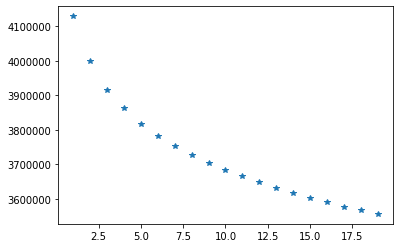

In [53]:
plt.plot(range(1,20),inn,'*')
plt.show()

In [54]:
kmeans = KMeans(n_clusters = 10,random_state = 42)
kmeans.fit(df['Vec'].tolist())
df['Cluster'] = kmeans.labels_
print ({i: len(np.where(kmeans.labels_ == i)[0]) for i in range(0,10)})
print('Words in cluster 1 :')
display(df[df['Cluster']==0]['Word'].sample(15))
print('Words in cluster 2 :')
display(df[df['Cluster']==1]['Word'].sample(15))
print('Words in cluster 3 :')
display(df[df['Cluster']==2]['Word'].sample(15))
print('Words in cluster 4 :')
display(df[df['Cluster']==3]['Word'].sample(15))
print('Words in cluster 5 :')
display(df[df['Cluster']==4]['Word'].sample(15))
print('Words in cluster 6 :')
display(df[df['Cluster']==5]['Word'].sample(15))
print('Words in cluster 7 :')
display(df[df['Cluster']==6]['Word'].sample(15))
print('Words in cluster 8 :')
display(df[df['Cluster']==7]['Word'].sample(15))
print('Words in cluster 9 :')
display(df[df['Cluster']==8]['Word'].sample(15))
print('Words in cluster 10 :')
display(df[df['Cluster']==9]['Word'].sample(15))

{0: 3872, 1: 6032, 2: 7104, 3: 4015, 4: 9981, 5: 4181, 6: 3963, 7: 3295, 8: 3998, 9: 2760}
Words in cluster 1 :


40772    The John Calvin Collection: 12 Classic Works [...
20914    What Happens When Women Walk in Faith [Kindle ...
39821    Generation to Generation: Family Process in Ch...
45605    Zen Questions: Zazen, Dogen, and the Spirit of...
47999    Light at the Edge of the World: A Journey Thro...
39677    Watchman Prayer: Keeping the Enemy Out While P...
44339    My Bangs Look Good and Other Lies I Tell Mysel...
40774         The Plan of God (Annotated) [Kindle Edition]
25044    SILAS MARNER (illustrated, complete and unabri...
22339     Essential Guide to Healing, The [Kindle Edition]
39988                  Christian Theology [Kindle Edition]
4857     The Freedom of Self Forgetfulness [Kindle Edit...
18575    Love, Life, God: The Journey of Creation [Kind...
42410              The Little Money Bible [Kindle Edition]
24086    Lead Like Jesus Daily Devotional (Life Bible S...
Name: Word, dtype: object

Words in cluster 2 :


31415                     Brogan's Island [Kindle Edition]
12777    Force of Nature (A Joe Pickett Novel) [Kindle ...
26757                         Trailerpark [Kindle Edition]
41024                        Girl Stalker [Kindle Edition]
14730                         Winter Kill [Kindle Edition]
14671    Solomon's Throne (The Quinn Adventures) [Kindl...
24841    No More Dying Then (Vintage Crime/Black Lizard...
21899                     Fear of Dragons [Kindle Edition]
10072                Warm Bodies: A Novel [Kindle Edition]
31782    Just Another Job - A Jonathan Quinn Story [Kin...
46291        Yesterday's Gone: Episode 21 [Kindle Edition]
27044                         Crow's Feat [Kindle Edition]
38635    PITCH BLACK - Thrilling Romantic Suspense - Bo...
42439    A Legal Affair (Romance, book 3) [Kindle Edition]
11655                   Before the Poison [Kindle Edition]
Name: Word, dtype: object

Words in cluster 3 :


5609     The Look of Love: The Sullivans, Book 1 (Conte...
16375    The Innocence of White (Vamp Chronicles) [Kind...
10162    Governor's Road: A Novel of Southern Proportio...
46446          Someone Like You (reissue) [Kindle Edition]
5778     Sisters in Love (Love in Bloom: Snow Sisters, ...
27008                       Overprotected [Kindle Edition]
16047              We Interrupt This Date [Kindle Edition]
48037    Jenny Pox (The Paranormals, Book 1) [Kindle Ed...
26388                     Falling for You [Kindle Edition]
32124                      Deadly Descent [Kindle Edition]
16588                        Cowboys Mine [Kindle Edition]
20086    Better Than Chance (Better Than Stories) [Kind...
21324    Bitter Crossroad (The Zook Family Revisited) [...
34600    Destination Wedding (Crimson Romance) [Kindle ...
28820    The Sassy Belles (A Sassy Belles Novel) [Kindl...
Name: Word, dtype: object

Words in cluster 4 :


30269    Structured Finance and Insurance: The ART of M...
9386     VisionMongers: Making a Life and a Living in P...
7017     Profitable Internet Marketing for Dental Pract...
42794    How To Make Money From Home FAST! [Kindle Edit...
1571     Predictable Revenue: Turn Your Business Into A...
18819    Truth About ETF Rotation - Fund Your Retiremen...
7707     The Five Most Important Questions You Will Eve...
46055    The Answer to How Is Yes: Acting on What Matte...
18661    Tax Lien and Deed Investing Quick Start Guide ...
17860    PROSPECT with SOUL for Real Estate Agents [Kin...
33031    The Forgotten Skills of Self-Sufficiency Used ...
44425    Fitness Marketing: A Guide to Marketing Your F...
15048     The Myth of the Rational Market [Kindle Edition]
2077         Rich Dad's CASHFLOW QUADRANT [Kindle Edition]
15874    The Rules of Management: A definitive code for...
Name: Word, dtype: object

Words in cluster 5 :


7345     Will in the World: How Shakespeare Became Shak...
39852    Sustaining formative assessment with teacher l...
15420    A Sand County Almanac: With Other Essays on Co...
10334    This Side of Paradise (Illustrated) [Kindle Ed...
25463    Fantastic Flying Books of Mr. Morris Lessmore ...
6091             Status Anxiety (Vintage) [Kindle Edition]
45531    Hua hu Ching: The Unknown Teachings of Lao Tzu...
22113                       Anna Karenina [Kindle Edition]
8568     Word Freak: Heartbreak, Triumph, Genius, and O...
8237      The Bitter Man's Guide to Women [Kindle Edition]
14955    Santa Needs You to be a Christmas Tree Inspect...
27752    The Sound of Waves (Vintage International) [Ki...
45873    Our Religions: The Seven World Religions Intro...
45803                    The Forest Lover [Kindle Edition]
15945      The Little Black Book of Style [Kindle Edition]
Name: Word, dtype: object

Words in cluster 6 :


1994     Rant: The Oral Biography of Buster Casey [Kind...
3648        Death and Honor (Honor Bound) [Kindle Edition]
43697    Yakuza: Japan's Criminal Underworld [Kindle Ed...
35244    History Buff's Guide to World War II: Top Ten ...
29443                      The False Door [Kindle Edition]
10911                     Okatibbee Creek [Kindle Edition]
29260    Whittaker Chambers: A Biography (Modern Librar...
13201                           Exit Plan [Kindle Edition]
16850    Prelude to Foundation (The Foundation Series) ...
26602                 Leader (Angel Paws) [Kindle Edition]
28275                 Behind German Lines [Kindle Edition]
26530    Caesar: A History of the Art of War Among the ...
8740     Code Name Antares (Navy SEAL Grant Stevens) [K...
35575              Between Love and Honor [Kindle Edition]
16797    The Rising Tide: A Novel of World War II [Kind...
Name: Word, dtype: object

Words in cluster 7 :


37653    Slow Family Living: 75 Simple Ways to Slow Dow...
39044    Brain games: free games for brain training - C...
39712    The Highly Sensitive Child: Helping Our Childr...
39500    An Introduction to Group Work Practice (7th Ed...
42031    The Intuitive Body: Discovering the Wisdom of ...
17194    Immunity to Change: How to Overcome It and Unl...
22508    On Top of Your Game: Mental Skills to Maximize...
40006    Brain-Based Therapy with Children and Adolesce...
40301    The Dumbest Mistakes Men Make With Women [Kind...
42408                        Silent Power [Kindle Edition]
1578     An Inside Job: 5 Steps to Anxiety Relief [Kind...
6296     Life Coaching Activities & Powerful Questions ...
9224     The Reverse Ultimatum: A Step-By-Step Plan To ...
40320    The Shyness and Social Anxiety Cure - How to O...
14460            Clean - Expanded Edition [Kindle Edition]
Name: Word, dtype: object

Words in cluster 8 :


48440    Baseball Hitting Drills for a Batting Tee (Pra...
41881    Qualitative Research Design: An Interactive Ap...
53       How to Start a Restaurant Without Losing Your ...
28115    Mechanically Inclined: Building Grammar, Usage...
36035    The Complete Works of Jane Austen (All Novels,...
37234    Just F*ck Me! - What Women Want Men to Know Ab...
40806    DIY Credit Repair (SHORT VERSION) - Knock Out ...
8115     Building the Better Guitar Scale [Kindle Edition]
44256    Opposition & Critical Squares: The most import...
25448    The Phantom Tollbooth: A Teaching Guide [Kindl...
17630    Communicating Design: Developing Web Site Docu...
18779    Getting Starting in Real Estate Investing: Fin...
27992    Quick Fixes - tales of Repairman Jack [Kindle ...
29953    Vector Basic Training: A Systematic Creative P...
48255    So, You Want to Move to France Too? No Problem...
Name: Word, dtype: object

Words in cluster 9 :


43290    The Propaganda Techniques Whats Really on Tele...
13830    The Anatomy Of Motive: The Fbis Legendary Mind...
48887           The Rise of the Tea Party [Kindle Edition]
28897    Prime Obsession: Bernhard Riemann and the Grea...
43876    Why Leaders Lie:The Truth About Lying in Inter...
4737     Ghost Hunters: William James and the Search fo...
15666            The Reminiscences of a Marine [Hardcover]
30080    The Third Wave: Democratization in the Late 20...
19767    The Unfinished Odyssey of Robert Kennedy [Kind...
19721           Bill Clinton: A Biography [Kindle Edition]
44811    The German Genius: Europe's Third Renaissance,...
6333     Three Huge Mistakes We Make Leading Kids and H...
29242    Obama and Islam (Updated and Revised) [Kindle ...
33113    This New Ocean: A History of Project Mercury (...
18667                              US Law [Kindle Edition]
Name: Word, dtype: object

Words in cluster 10 :


5417     Well Fed: Paleo Recipes for People Who Love to...
42548    Baby books: The First Book of Colors and Fruit...
23668    HERBS FOR LOVE: ENHANCE YOUR SEX LIFE (Nature'...
13689    The Intelligent Gardener: Growing Nutrient Den...
24233    My No-Knead Bread Cookbook: From the Kitchen o...
9380     A Guide to Tasteful Food Blogging [Kindle Edit...
17822            Eating Clean For Dummies [Kindle Edition]
13916    Nigella Express: Good Food, Fast [Kindle Edition]
12538            The Magic of Baking Soda [Kindle Edition]
4709     475 Herbal and Aromatherapy Recipes [Kindle Ed...
36468    Fitting a Paleo Diet into a Busy Lifestyle (Th...
13695    Coconut Oil: Easy Homemade Solutions for Beaut...
23283    Cavemen, Monks and Slow Food: A History of Eat...
33050    The Wild & Weedy Apothecary: An A to Z Book of...
17419    The Blood Sugar Solution Cookbook: More than 1...
Name: Word, dtype: object